Raúl Alejandro Monzon Solís 17014

#<Center> Proyecto 1
---

Importacion de las librerias a utilizar


In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn  as sb
%matplotlib inline

#Limpieza de datos

NOTA
---

No se elimino zona_ocu en la limpieza de datos a pesar de que tenía varíos datos ignorados. Esto debe a que inicialmente se pensaba mostrar una gráfica comparando las veces que fue ignorada la zona con las demás frecuencia de las demás zonas. Pero finalmente se decidió ya no realizar la comparación

## Fallecidos y lesionados 


Año 2019
---

In [ ]:
fyl19 = pd.read_excel('fyl19.xlsx', comment='#')
fyl19.head()

,núm_corre,año_ocu,día_ocu,hora_ocu,g_hora,g_hora_5,mes_ocu,día_sem_ocu,depto_ocu,mupio_ocu,zona_ocu,sexo_per,edad_per,g_edad_80ymás,g_edad_60ymás,edad_quinquenales,mayor_menor,color_veh,modelo_veh,g_modelo_veh,tipo_eve,fall_les,tipo_veh,marca_veh,int_o_noint
0,1,2019,1,5,1,1,1,2,1,101,3,1,20,3,3,5,1,5,2018,5,6,2,4,64,1
1,2,2019,1,21,4,3,1,2,1,101,1,1,30,5,5,7,1,5,2018,5,1,2,4,6,1
2,3,2019,1,21,4,3,1,2,1,101,1,2,34,5,5,7,1,5,2018,5,1,2,4,6,1
3,4,2019,1,7,2,1,1,2,1,101,18,1,30,5,5,7,1,5,2018,5,1,2,4,18,1
4,5,2019,1,11,2,1,1,2,1,102,99,1,23,3,3,5,1,3,2006,4,1,2,4,67,1


In [ ]:
contain_null = fyl19.isnull().apply(lambda col: col.value_counts(normalize=True), axis=0)
contain_null_cols = contain_null.transpose()
contain_null_cols

,False
núm_corre,1.0
año_ocu,1.0
día_ocu,1.0
hora_ocu,1.0
g_hora,1.0
g_hora_5,1.0
mes_ocu,1.0
día_sem_ocu,1.0
depto_ocu,1.0
mupio_ocu,1.0


No hay datos faltantes, pasamos a verificar si hay datos que no nos sirvan



Buscamos si faltan valores en alguna columna

In [ ]:
print("día_sem_ocu")
print(fyl19["día_sem_ocu"].value_counts())
print("\nzona_ocu")
print(fyl19["zona_ocu"].value_counts())

día_sem_ocu
7    2042
6    1955
5    1576
1    1385
4    1275
2    1222
3    1209
Name: día_sem_ocu, dtype: int64

zona_ocu
99    8689
1      330
12     233
7      231
18     205
6      123
11     112
9       92
5       86
3       81
13      79
10      64
8       58
17      53
4       46
2       45
16      32
21      30
15      22
19      21
14      16
25      14
24       2
Name: zona_ocu, dtype: int64


La mayoría de veces se ignora la zona en la que ocurre el accidente

In [ ]:
print("año_ocu")
print(fyl19["año_ocu"].value_counts())
print("\ndía_ocu")
print(fyl19["día_ocu"].value_counts())
print("\nmes_ocu")
print(fyl19["mes_ocu"].value_counts())
print("\nhora_ocu")
print(fyl19["hora_ocu"].value_counts())
print("\ng_hora")
print(fyl19["g_hora"].value_counts())


año_ocu
2019    10664
Name: año_ocu, dtype: int64

día_ocu
18    448
20    424
16    420
1     418
17    404
15    395
24    392
27    388
14    386
21    382
29    371
19    366
13    356
30    344
26    344
8     340
12    333
4     331
3     328
9     328
10    326
28    324
22    319
25    313
2     309
23    305
7     288
6     280
5     274
11    273
31    155
Name: día_ocu, dtype: int64

mes_ocu
4     1027
3     1017
12     993
5      938
1      922
9      917
2      869
6      859
8      847
11     817
7      768
10     690
Name: mes_ocu, dtype: int64

hora_ocu
19    834
18    745
20    729
17    637
15    580
21    554
16    528
23    494
22    479
13    471
11    470
12    439
14    435
8     427
0     402
6     361
9     340
7     330
10    313
1     312
2     226
5     214
4     211
3     133
Name: hora_ocu, dtype: int64

g_hora
4    3835
3    3090
2    2241
1    1498
Name: g_hora, dtype: int64


In [ ]:
print("g_hora_5")
print(fyl19["g_hora_5"].value_counts())
print("\ndepto_ocu")
print(fyl19["depto_ocu"].value_counts())
print("\nnmes_ocu")
print(fyl19["mes_ocu"].value_counts())
print("\nmupio_ocu")
print(fyl19["mupio_ocu"].value_counts())
print("\nzona_ocu")
print(fyl19["zona_ocu"].value_counts())

g_hora_5
3    3835
1    3739
2    3090
Name: g_hora_5, dtype: int64

depto_ocu
1     3805
5      838
16     583
4      400
3      394
10     385
17     367
22     365
18     358
6      349
9      340
11     308
2      298
7      286
19     270
20     262
15     244
12     222
14     180
13     165
21     125
8      120
Name: depto_ocu, dtype: int64

nmes_ocu
4     1027
3     1017
12     993
5      938
1      922
9      917
2      869
6      859
8      847
11     817
7      768
10     690
Name: mes_ocu, dtype: int64

mupio_ocu
101     1981
108      478
115      442
501      349
114      173
        ... 
804        1
1611       1
1225       1
908        1
1209       1
Name: mupio_ocu, Length: 306, dtype: int64

zona_ocu
99    8689
1      330
12     233
7      231
18     205
6      123
11     112
9       92
5       86
3       81
13      79
10      64
8       58
17      53
4       46
2       45
16      32
21      30
15      22
19      21
14      16
25      14
24       2
Name: zona_ocu, dty

In [ ]:
print("edad_per")
print(fyl19["edad_per"].value_counts())
print("\ng_edad_80ymás")
print(fyl19["g_edad_80ymás"].value_counts())
print("\nedad_quinquenales")
print(fyl19["edad_quinquenales"].value_counts())
print("\nmayor_menor")
print(fyl19["mayor_menor"].value_counts())
print("\ntipo_veh")
print(fyl19["tipo_veh"].value_counts())

edad_per
999    703
25     437
22     434
23     412
21     374
      ... 
94       2
96       1
88       1
91       1
98       1
Name: edad_per, Length: 97, dtype: int64

g_edad_80ymás
3     1904
4     1573
5     1122
1     1111
2     1102
6      761
16     703
7      567
8      426
9      368
10     294
11     217
12     171
13     145
15     111
14      89
Name: g_edad_80ymás, dtype: int64

edad_quinquenales
5     1904
6     1573
7     1122
4     1102
8      761
18     703
9      567
3      437
10     426
2      384
11     368
12     294
1      290
13     217
14     171
15     145
17     111
16      89
Name: edad_quinquenales, dtype: int64

mayor_menor
1    8826
2    1603
9     235
Name: mayor_menor, dtype: int64

tipo_veh
4     4669
1     1393
3     1237
12     742
99     654
2      500
9      493
5      363
7      208
14     185
6       78
18      54
11      52
22      19
8        9
10       4
13       3
16       1
Name: tipo_veh, dtype: int64


In [ ]:
print("tipo_eve")
print(fyl19["tipo_eve"].value_counts())
print("\nfall_les")
print(fyl19["fall_les"].value_counts())
print("\int_o_noint")
print(fyl19["int_o_noint"].value_counts())

tipo_eve
1     5422
5     2424
3     1014
2      905
6      470
4      423
99       6
Name: tipo_eve, dtype: int64

fall_les
2    8903
1    1757
9       4
Name: fall_les, dtype: int64
\int_o_noint
1    8539
2    2122
9       3
Name: int_o_noint, dtype: int64


In [ ]:
fyl19_limpio = fyl19.drop(["edad_quinquenales","g_hora_5","marca_veh","g_edad_60ymás","color_veh","modelo_veh","g_modelo_veh"], axis=1)
fyl19_limpio.head()

,núm_corre,año_ocu,día_ocu,hora_ocu,g_hora,mes_ocu,día_sem_ocu,depto_ocu,mupio_ocu,zona_ocu,sexo_per,edad_per,g_edad_80ymás,mayor_menor,tipo_eve,fall_les,tipo_veh,int_o_noint
0,1,2019,1,5,1,1,2,1,101,3,1,20,3,1,6,2,4,1
1,2,2019,1,21,4,1,2,1,101,1,1,30,5,1,1,2,4,1
2,3,2019,1,21,4,1,2,1,101,1,2,34,5,1,1,2,4,1
3,4,2019,1,7,2,1,2,1,101,18,1,30,5,1,1,2,4,1
4,5,2019,1,11,2,1,2,1,102,99,1,23,3,1,1,2,4,1


Año 2018
---

In [ ]:
fyl18 = pd.read_excel('fyl18.xlsx', comment='#')
fyl18.head()

,núm_corre,año_ocu,día_ocu,hora_ocu,g_hora,g_hora_5,mes_ocu,día_sem_ocu,mupio_ocu,depto_ocu,zona_ocu,sexo_per,edad_per,g_edad_80ymás,g_edad_60ymás,edad_quinquenales,mayor_menor,tipo_veh,marca_veh,color_veh,modelo_veh,g_modelo_veh,tipo_eve,fall_les,int_o_noint
0,1,2018,1,16,3,2,1,1,115,1,99,1,28,4,4,6,1,4,32,5,9999,99,2,2,1
1,2,2018,1,12,3,2,1,1,2207,22,99,2,18,2,2,4,1,4,6,1,9999,99,1,2,1
2,3,2018,1,7,2,1,1,1,2102,21,99,1,42,7,7,9,1,1,999,6,9999,99,2,1,2
3,4,2018,1,22,4,3,1,1,1903,19,99,1,17,2,2,4,2,4,999,5,9999,99,2,2,1
4,5,2018,1,23,4,3,1,1,1903,19,99,1,47,8,8,10,1,4,27,5,9999,99,2,1,2


In [ ]:
contain_null = fyl18.isnull().apply(lambda col: col.value_counts(normalize=True), axis=0)
contain_null_cols = contain_null.transpose()
contain_null_cols

,False
núm_corre,1.0
año_ocu,1.0
día_ocu,1.0
hora_ocu,1.0
g_hora,1.0
g_hora_5,1.0
mes_ocu,1.0
día_sem_ocu,1.0
mupio_ocu,1.0
depto_ocu,1.0


In [ ]:
print("día_sem_ocu")
print(fyl18["día_sem_ocu"].value_counts())
print("\nzona_ocu")
print(fyl18["zona_ocu"].value_counts())
print("\naño_ocu")
print(fyl18["año_ocu"].value_counts())
print("\ndía_ocu")
print(fyl18["día_ocu"].value_counts())
print("\nmes_ocu")
print(fyl18["mes_ocu"].value_counts())
print("\nhora_ocu")
print(fyl18["hora_ocu"].value_counts())
print("\ng_hora")
print(fyl18["g_hora"].value_counts())
print("\ng_hora_5")
print(fyl18["g_hora_5"].value_counts())
print("\ndepto_ocu")
print(fyl18["depto_ocu"].value_counts())
print("\nnmes_ocu")
print(fyl18["mes_ocu"].value_counts())
print("\nmupio_ocu")
print(fyl18["mupio_ocu"].value_counts())
print("\nzona_ocu")
print(fyl18["zona_ocu"].value_counts())
print("\nedad_per")
print(fyl18["edad_per"].value_counts())
print("\ng_edad_80ymás")
print(fyl18["g_edad_80ymás"].value_counts())
print("\nedad_quinquenales")
print(fyl18["edad_quinquenales"].value_counts())
print("\nmayor_menor")
print(fyl18["mayor_menor"].value_counts())
print("\ntipo_veh")
print(fyl18["tipo_veh"].value_counts())
print("tipo_eve")
print(fyl18["tipo_eve"].value_counts())
print("\nfall_les")
print(fyl18["fall_les"].value_counts())
print("\int_o_noint")
print(fyl18["int_o_noint"].value_counts())


día_sem_ocu
7    1794
6    1748
1    1286
5    1221
4    1218
2    1127
3    1013
Name: día_sem_ocu, dtype: int64

zona_ocu
99    7511
1      292
7      212
18     201
12     180
6      135
11     123
9      122
3       87
13      80
5       78
10      65
17      56
2       48
8       42
4       34
16      33
15      33
21      21
14      20
19      18
25      15
24       1
Name: zona_ocu, dtype: int64

año_ocu
2018    9407
Name: año_ocu, dtype: int64

día_ocu
1     448
21    417
2     383
29    346
18    346
15    338
3     336
14    327
22    320
20    310
30    304
4     301
16    301
8     301
13    300
5     299
17    296
28    296
26    296
25    295
12    292
27    291
23    283
19    264
10    262
7     260
11    258
6     243
9     236
24    230
31    228
Name: día_ocu, dtype: int64

mes_ocu
3     1110
12     958
1      832
9      829
11     783
7      765
8      725
2      718
6      687
5      677
4      667
10     656
Name: mes_ocu, dtype: int64

hora_ocu
18    627
19    62

In [ ]:
fyl18_limpio = fyl18.drop(["edad_quinquenales","g_hora_5","marca_veh","g_edad_60ymás","color_veh","modelo_veh","g_modelo_veh"], axis=1)
fyl18_limpio.head()

,núm_corre,año_ocu,día_ocu,hora_ocu,g_hora,mes_ocu,día_sem_ocu,mupio_ocu,depto_ocu,zona_ocu,sexo_per,edad_per,g_edad_80ymás,mayor_menor,tipo_veh,tipo_eve,fall_les,int_o_noint
0,1,2018,1,16,3,1,1,115,1,99,1,28,4,1,4,2,2,1
1,2,2018,1,12,3,1,1,2207,22,99,2,18,2,1,4,1,2,1
2,3,2018,1,7,2,1,1,2102,21,99,1,42,7,1,1,2,1,2
3,4,2018,1,22,4,1,1,1903,19,99,1,17,2,2,4,2,2,1
4,5,2018,1,23,4,1,1,1903,19,99,1,47,8,1,4,2,1,2


Año 2017
---

In [ ]:
fyl17 = pd.read_excel('fyl17.xlsx', comment='#')
fyl17.head()

,núm_corre,año_ocu,día_ocu,hora_ocu,g_hora,g_hora_5,mes_ocu,día_sem_ocu,mupio_ocu,depto_ocu,zona_ocu,sexo_per,edad_per,g_edad_80ymás,g_edad_60ymás,edad_quinquenales,mayor_menor,tipo_veh,marca_veh,color_veh,modelo_veh,g_modelo_veh,tipo_eve,fall_les,int_o_noint
0,1,2017,1,1,1,1,1,7,101,1,6,2,23,3,3,5,1,1,28,2,9999,6,1,2,1
1,2,2017,1,1,1,1,1,7,101,1,6,2,4,1,1,1,2,1,28,2,9999,6,1,2,1
2,3,2017,1,1,1,1,1,7,101,1,6,2,14,1,1,3,2,1,28,2,9999,6,1,2,1
3,4,2017,1,2,1,1,1,7,110,1,99,1,20,3,3,5,1,4,18,1,9999,6,2,2,1
4,5,2017,1,2,1,1,1,7,110,1,99,2,21,3,3,5,1,4,18,1,9999,6,2,2,1


In [ ]:
contain_null = fyl17.isnull().apply(lambda col: col.value_counts(normalize=True), axis=0)
contain_null_cols = contain_null.transpose()
contain_null_cols

,False
núm_corre,1.0
año_ocu,1.0
día_ocu,1.0
hora_ocu,1.0
g_hora,1.0
g_hora_5,1.0
mes_ocu,1.0
día_sem_ocu,1.0
mupio_ocu,1.0
depto_ocu,1.0


In [ ]:
print("día_sem_ocu")
print(fyl17["día_sem_ocu"].value_counts())
print("\nzona_ocu")
print(fyl17["zona_ocu"].value_counts())
print("\naño_ocu")
print(fyl17["año_ocu"].value_counts())
print("\ndía_ocu")
print(fyl17["día_ocu"].value_counts())
print("\nmes_ocu")
print(fyl17["mes_ocu"].value_counts())
print("\nhora_ocu")
print(fyl17["hora_ocu"].value_counts())
print("\ng_hora")
print(fyl17["g_hora"].value_counts())
print("\ng_hora_5")
print(fyl17["g_hora_5"].value_counts())
print("\ndepto_ocu")
print(fyl17["depto_ocu"].value_counts())
print("\nnmes_ocu")
print(fyl17["mes_ocu"].value_counts())
print("\nmupio_ocu")
print(fyl17["mupio_ocu"].value_counts())
print("\nzona_ocu")
print(fyl17["zona_ocu"].value_counts())
print("\nedad_per")
print(fyl17["edad_per"].value_counts())
print("\ng_edad_80ymás")
print(fyl17["g_edad_80ymás"].value_counts())
print("\nedad_quinquenales")
print(fyl17["edad_quinquenales"].value_counts())
print("\nmayor_menor")
print(fyl17["mayor_menor"].value_counts())
print("\ntipo_veh")
print(fyl17["tipo_veh"].value_counts())
print("tipo_eve")
print(fyl17["tipo_eve"].value_counts())
print("\nfall_les")
print(fyl17["fall_les"].value_counts())
print("\int_o_noint")
print(fyl17["int_o_noint"].value_counts())

día_sem_ocu
7    1753
6    1556
5    1150
4    1140
1    1057
2    1018
3     951
Name: día_sem_ocu, dtype: int64

zona_ocu
99    7010
1      297
18     190
7      146
12     142
6      120
11      97
5       97
9       83
10      61
13      61
2       48
3       47
17      41
8       32
19      30
21      30
4       25
15      23
16      22
24      11
14       8
25       4
Name: zona_ocu, dtype: int64

año_ocu
2017    8625
Name: año_ocu, dtype: int64

día_ocu
28    340
21    326
1     321
4     319
15    319
2     317
13    317
19    303
12    301
11    298
26    297
22    290
16    290
10    287
30    287
3     285
5     284
24    277
25    274
6     272
9     269
18    261
17    258
20    257
14    253
8     251
23    244
29    231
7     230
27    222
31    145
Name: día_ocu, dtype: int64

mes_ocu
4     1006
12     894
7      802
11     744
1      682
10     679
9      672
5      668
6      663
2      653
3      622
8      540
Name: mes_ocu, dtype: int64

hora_ocu
19    580
17    55

In [ ]:
fyl17_limpio = fyl17.drop(["edad_quinquenales","g_hora_5","marca_veh","g_edad_60ymás","color_veh","modelo_veh","g_modelo_veh"], axis=1)
fyl17_limpio.head()

,núm_corre,año_ocu,día_ocu,hora_ocu,g_hora,mes_ocu,día_sem_ocu,mupio_ocu,depto_ocu,zona_ocu,sexo_per,edad_per,g_edad_80ymás,mayor_menor,tipo_veh,tipo_eve,fall_les,int_o_noint
0,1,2017,1,1,1,1,7,101,1,6,2,23,3,1,1,1,2,1
1,2,2017,1,1,1,1,7,101,1,6,2,4,1,2,1,1,2,1
2,3,2017,1,1,1,1,7,101,1,6,2,14,1,2,1,1,2,1
3,4,2017,1,2,1,1,7,110,1,99,1,20,3,1,4,2,2,1
4,5,2017,1,2,1,1,7,110,1,99,2,21,3,1,4,2,2,1


Año 2016
---

In [ ]:
fyl16 = pd.read_excel('fyl16.xlsx', comment='#')
fyl16.head()

,núm_corre,día_ocu,año_ocu,hora_ocu,mes_ocu,día_sem_ocu,mupio_ocu,depto_ocu,área_geo_ocu,zona_ocu,sexo_per,edad_per,mayor_menor,tipo_veh,marca_veh,color_veh,modelo_veh,tipo_eve,g_edad_80ymás,g_edad_60ymás,edad_quinquenales,g_hora,g_hora_5,g_modelo_veh,fall_les,int_o_noint
0,1,1,2016,2,1,5,101,1,1,1,1,27,1,4,999,9,9999,1,4,4,6,1,1,6,2,1
1,2,1,2016,2,1,5,101,1,1,1,1,38,1,4,999,9,9999,1,6,6,8,1,1,6,2,1
2,3,1,2016,13,1,5,101,1,1,18,2,58,1,1,999,2,9999,1,10,10,12,3,2,6,2,2
3,4,1,2016,13,1,5,101,1,1,18,2,38,1,1,999,2,9999,1,6,6,8,3,2,6,2,2
4,5,1,2016,13,1,5,101,1,1,18,2,48,1,1,999,2,9999,1,8,8,10,3,2,6,2,1


In [ ]:
contain_null = fyl16.isnull().apply(lambda col: col.value_counts(normalize=True), axis=0)
contain_null_cols = contain_null.transpose()
contain_null_cols

,False
núm_corre,1.0
día_ocu,1.0
año_ocu,1.0
hora_ocu,1.0
mes_ocu,1.0
día_sem_ocu,1.0
mupio_ocu,1.0
depto_ocu,1.0
área_geo_ocu,1.0
zona_ocu,1.0


In [ ]:
print("día_sem_ocu")
print(fyl16["día_sem_ocu"].value_counts())
print("\nzona_ocu")
print(fyl16["zona_ocu"].value_counts())
print("\naño_ocu")
print(fyl16["año_ocu"].value_counts())
print("\ndía_ocu")
print(fyl16["día_ocu"].value_counts())
print("\nmes_ocu")
print(fyl16["mes_ocu"].value_counts())
print("\nhora_ocu")
print(fyl16["hora_ocu"].value_counts())
print("\ng_hora")
print(fyl16["g_hora"].value_counts())
print("\ng_hora_5")
print(fyl16["g_hora_5"].value_counts())
print("\ndepto_ocu")
print(fyl16["depto_ocu"].value_counts())
print("\nnmes_ocu")
print(fyl16["mes_ocu"].value_counts())
print("\nmupio_ocu")
print(fyl16["mupio_ocu"].value_counts())
print("\nzona_ocu")
print(fyl16["zona_ocu"].value_counts())
print("\nedad_per")
print(fyl16["edad_per"].value_counts())
print("\ng_edad_80ymás")
print(fyl16["g_edad_80ymás"].value_counts())
print("\nedad_quinquenales")
print(fyl16["edad_quinquenales"].value_counts())
print("\nmayor_menor")
print(fyl16["mayor_menor"].value_counts())
print("\ntipo_veh")
print(fyl16["tipo_veh"].value_counts())
print("tipo_eve")
print(fyl16["tipo_eve"].value_counts())
print("\nfall_les")
print(fyl16["fall_les"].value_counts())
print("\int_o_noint")
print(fyl16["int_o_noint"].value_counts())

día_sem_ocu
7    2247
6    2117
1    1761
5    1601
4    1403
2    1300
3    1239
Name: día_sem_ocu, dtype: int64

zona_ocu
99    9791
1      309
7      212
12     211
11     194
18     139
9      124
13      84
5       84
10      83
6       77
3       64
8       49
17      39
2       35
4       32
21      32
16      27
15      26
19      25
14      21
25      10
Name: zona_ocu, dtype: int64

año_ocu
2016    11668
Name: año_ocu, dtype: int64

día_ocu
24    479
16    464
1     463
28    449
2     441
19    431
25    431
22    429
15    404
18    404
10    393
30    386
20    378
6     376
17    371
11    367
14    365
5     365
4     360
13    349
21    347
3     344
29    343
12    336
7     335
8     333
23    330
26    318
27    316
9     282
31    279
Name: día_ocu, dtype: int64

mes_ocu
3     1242
5     1123
12    1084
10     978
2      959
9      959
11     953
4      910
7      909
1      895
8      872
6      784
Name: mes_ocu, dtype: int64

hora_ocu
19    745
21    725
20    70

In [ ]:
fyl16_limpio = fyl16.drop(["área_geo_ocu","edad_quinquenales","g_hora_5","marca_veh","g_edad_60ymás","color_veh","modelo_veh","g_modelo_veh"], axis=1)
fyl16_limpio.head()

,núm_corre,día_ocu,año_ocu,hora_ocu,mes_ocu,día_sem_ocu,mupio_ocu,depto_ocu,zona_ocu,sexo_per,edad_per,mayor_menor,tipo_veh,tipo_eve,g_edad_80ymás,g_hora,fall_les,int_o_noint
0,1,1,2016,2,1,5,101,1,1,1,27,1,4,1,4,1,2,1
1,2,1,2016,2,1,5,101,1,1,1,38,1,4,1,6,1,2,1
2,3,1,2016,13,1,5,101,1,18,2,58,1,1,1,10,3,2,2
3,4,1,2016,13,1,5,101,1,18,2,38,1,1,1,6,3,2,2
4,5,1,2016,13,1,5,101,1,18,2,48,1,1,1,8,3,2,1


Año 2015
---


In [ ]:
fyl15 = pd.read_excel('fyl15.xlsx', comment='#')
fyl15.head()

,núm_corre,año_ocu,mes_ocu,día_ocu,día_sem_ocu,hora_ocu,g_hora,g_hora_5,depto_ocu,mupio_ocu,área_geo_ocu,zona_ocu,sexo_per,edad_per,mayor_menor,g_edad_80ymás,g_edad_60ymás,edad_quinquenales,fall_les,int_o_noint,tipo_veh,marca_veh,color_veh,modelo_veh,g_modelo_veh,tipo_eve
0,1,2015,1,1,4,16,3,2,1,101,1,1,1,19,1,2,2,4,2,1,4,21,5,2011,5,1
1,2,2015,1,1,4,16,3,2,1,101,1,1,2,19,1,2,2,4,2,1,4,21,5,2011,5,1
2,3,2015,1,1,4,22,4,3,1,101,1,16,1,32,1,5,5,7,2,1,4,21,5,9999,6,1
3,4,2015,1,1,4,2,1,1,1,101,1,7,1,18,1,2,2,4,2,1,4,21,1,2000,4,1
4,5,2015,1,1,4,9,2,1,1,101,1,12,1,20,1,3,3,5,1,2,4,40,5,9999,6,2


In [ ]:
contain_null = fyl15.isnull().apply(lambda col: col.value_counts(normalize=True), axis=0)
contain_null_cols = contain_null.transpose()
contain_null_cols

,False
núm_corre,1.0
año_ocu,1.0
mes_ocu,1.0
día_ocu,1.0
día_sem_ocu,1.0
hora_ocu,1.0
g_hora,1.0
g_hora_5,1.0
depto_ocu,1.0
mupio_ocu,1.0


In [ ]:
print("día_sem_ocu")
print(fyl15["día_sem_ocu"].value_counts())
print("\nzona_ocu")
print(fyl15["zona_ocu"].value_counts())
print("\naño_ocu")
print(fyl15["año_ocu"].value_counts())
print("\ndía_ocu")
print(fyl15["día_ocu"].value_counts())
print("\nmes_ocu")
print(fyl15["mes_ocu"].value_counts())
print("\nhora_ocu")
print(fyl15["hora_ocu"].value_counts())
print("\ng_hora")
print(fyl15["g_hora"].value_counts())
print("\ng_hora_5")
print(fyl15["g_hora_5"].value_counts())
print("\ndepto_ocu")
print(fyl15["depto_ocu"].value_counts())
print("\nnmes_ocu")
print(fyl15["mes_ocu"].value_counts())
print("\nmupio_ocu")
print(fyl15["mupio_ocu"].value_counts())
print("\nzona_ocu")
print(fyl15["zona_ocu"].value_counts())
print("\nedad_per")
print(fyl15["edad_per"].value_counts())
print("\ng_edad_80ymás")
print(fyl15["g_edad_80ymás"].value_counts())
print("\nedad_quinquenales")
print(fyl15["edad_quinquenales"].value_counts())
print("\nmayor_menor")
print(fyl15["mayor_menor"].value_counts())
print("\ntipo_veh")
print(fyl15["tipo_veh"].value_counts())
print("tipo_eve")
print(fyl15["tipo_eve"].value_counts())
print("\nfall_les")
print(fyl15["fall_les"].value_counts())
print("\int_o_noint")
print(fyl15["int_o_noint"].value_counts())

día_sem_ocu
7    2068
6    1887
5    1495
4    1354
1    1302
2    1149
3    1142
Name: día_sem_ocu, dtype: int64

zona_ocu
99    7611
1      562
12     241
18     225
7      189
5      178
11     174
6      174
3      164
2      161
9      132
10     110
4      109
13      90
8       85
16      43
17      36
19      35
21      28
14      17
24      13
15      13
25       7
Name: zona_ocu, dtype: int64

año_ocu
2015    10397
Name: año_ocu, dtype: int64

día_ocu
1     431
2     428
4     402
24    379
28    374
25    368
11    362
6     361
16    351
14    349
18    347
17    346
20    345
5     345
13    341
7     338
15    330
10    322
26    321
19    318
27    317
22    311
30    308
29    301
12    300
9     299
21    295
8     293
31    274
3     272
23    269
Name: día_ocu, dtype: int64

mes_ocu
12    1041
8      958
11     940
4      936
7      856
10     850
5      838
6      820
2      799
9      792
3      785
1      782
Name: mes_ocu, dtype: int64

hora_ocu
19    780
18    6

In [ ]:
fyl15_limpio = fyl15.drop(["área_geo_ocu","edad_quinquenales","g_hora_5","marca_veh","g_edad_60ymás","color_veh","modelo_veh","g_modelo_veh"], axis=1)
fyl15_limpio.head()

,núm_corre,año_ocu,mes_ocu,día_ocu,día_sem_ocu,hora_ocu,g_hora,depto_ocu,mupio_ocu,zona_ocu,sexo_per,edad_per,mayor_menor,g_edad_80ymás,fall_les,int_o_noint,tipo_veh,tipo_eve
0,1,2015,1,1,4,16,3,1,101,1,1,19,1,2,2,1,4,1
1,2,2015,1,1,4,16,3,1,101,1,2,19,1,2,2,1,4,1
2,3,2015,1,1,4,22,4,1,101,16,1,32,1,5,2,1,4,1
3,4,2015,1,1,4,2,1,1,101,7,1,18,1,2,2,1,4,1
4,5,2015,1,1,4,9,2,1,101,12,1,20,1,3,1,2,4,2


### *observaciones*: 
En la columna de edades quinquenales también observamos que hubieron más de mil niños menores a 14 años involucrados.

Además a partir del año 2017 la columna área_geo_ocu fue eliminada.


Nota:
Además a partir del año 2017 la columna área_geo_ocu fue eliminada.

Hechos de transito
---

Año 2019
---

In [ ]:
hdt19 = pd.read_excel('hdt19.xlsx', comment='#')
hdt19.head()

,núm_corre,año_ocu,día_ocu,hora_ocu,g_hora,g_hora_5,mes_ocu,día_sem_ocu,depto_ocu,mupio_ocu,zona_ocu,tipo_veh,marca_veh,color_veh,modelo_veh,g_modelo_veh,tipo_eve
0,1,2019,1,5,1,1,1,2,1,101,3,4,64,5,2018,5,6
1,2,2019,1,21,4,3,1,2,1,101,1,2,90,14,9999,99,1
2,3,2019,1,7,2,1,1,2,1,101,18,1,41,8,2019,5,1
3,4,2019,1,11,2,1,1,2,1,102,99,1,69,5,2007,4,1
4,5,2019,1,8,2,1,1,2,1,101,7,4,27,1,9999,99,6


In [ ]:
contain_null = hdt19.isnull().apply(lambda col: col.value_counts(normalize=True), axis=0)
contain_null_cols = contain_null.transpose()
contain_null_cols

,False
núm_corre,1.0
año_ocu,1.0
día_ocu,1.0
hora_ocu,1.0
g_hora,1.0
g_hora_5,1.0
mes_ocu,1.0
día_sem_ocu,1.0
depto_ocu,1.0
mupio_ocu,1.0


In [ ]:
print("año_ocu")
print(hdt19["año_ocu"].value_counts())
print("\ndía_ocu")
print(hdt19["día_ocu"].value_counts())
print("\nhora_ocu")
print(hdt19["hora_ocu"].value_counts())
print("\nmes_ocu")
print(hdt19["mes_ocu"].value_counts())
print("\nmupio_ocu")
print(hdt19["mupio_ocu"].value_counts())
print("\nzona_ocu")
print(hdt19["zona_ocu"].value_counts())
print("\ntipo_veh")
print(hdt19["tipo_veh"].value_counts())
print("\ntipo_veh")
print(hdt19["tipo_veh"].value_counts())
print("\ntipo_eve")
print(hdt19["tipo_eve"].value_counts())


año_ocu
2019    7047
Name: año_ocu, dtype: int64

día_ocu
15    281
1     270
17    264
14    263
18    249
21    247
9     242
13    241
24    238
19    236
12    234
16    230
23    230
20    229
2     229
26    229
10    226
27    225
25    225
3     224
22    223
30    222
6     221
8     219
4     219
29    214
28    210
7     205
5     200
11    192
31    110
Name: día_ocu, dtype: int64

hora_ocu
19    530
20    489
18    465
21    435
17    411
22    397
23    378
0     318
15    316
16    315
13    284
14    271
11    270
8     265
12    258
1     252
7     238
10    211
9     202
2     182
6     179
5     157
3     113
4     111
Name: hora_ocu, dtype: int64

mes_ocu
3     658
12    634
2     614
4     600
6     590
5     590
1     589
11    587
9     581
8     578
7     528
10    498
Name: mes_ocu, dtype: int64

mupio_ocu
101     1641
108      403
115      336
501      183
401      111
        ... 
908        1
804        1
716        1
708        1
1323       1
Name: mupio_oc

In [ ]:
hdt19_limpio = hdt19.drop(["núm_corre","g_hora","g_hora_5","mupio_ocu","marca_veh","color_veh","modelo_veh","g_modelo_veh"], axis=1)
hdt19_limpio.head()

,año_ocu,día_ocu,hora_ocu,mes_ocu,día_sem_ocu,depto_ocu,zona_ocu,tipo_veh,tipo_eve
0,2019,1,5,1,2,1,3,4,6
1,2019,1,21,1,2,1,1,2,1
2,2019,1,7,1,2,1,18,1,1
3,2019,1,11,1,2,1,99,1,1
4,2019,1,8,1,2,1,7,4,6


Año 2018 
---

In [ ]:
hdt18 = pd.read_excel('hdt18.xlsx', comment='#')
hdt18.head()

,núm_corre,año_ocu,día_ocu,hora_ocu,g_hora,g_hora_5,mes_ocu,día_sem_ocu,mupio_ocu,depto_ocu,zona_ocu,tipo_veh,marca_veh,color_veh,modelo_veh,g_modelo_veh,tipo_eve
0,1,2018,1,16,3,2,1,1,115,1,99,4,32,5,9999,99,2
1,2,2018,1,12,3,2,1,1,2207,22,99,1,69,2,9999,99,1
2,3,2018,1,7,2,1,1,1,2102,21,99,1,999,6,9999,99,2
3,4,2018,1,22,4,3,1,1,1903,19,99,4,999,5,9999,99,2
4,5,2018,1,23,4,3,1,1,1903,19,99,4,27,5,9999,99,2


In [ ]:
print("año_ocu")
print(hdt18["año_ocu"].value_counts())
print("\ndía_ocu")
print(hdt18["día_ocu"].value_counts())
print("\nhora_ocu")
print(hdt18["hora_ocu"].value_counts())
print("\nmes_ocu")
print(hdt18["mes_ocu"].value_counts())
print("\nmupio_ocu")
print(hdt18["mupio_ocu"].value_counts())
print("\nzona_ocu")
print(hdt18["zona_ocu"].value_counts())
print("\ntipo_veh")
print(hdt18["tipo_veh"].value_counts())
print("\ntipo_veh")
print(hdt18["tipo_veh"].value_counts())
print("\ntipo_eve")
print(hdt18["tipo_eve"].value_counts())

año_ocu
2018    6395
Name: año_ocu, dtype: int64

día_ocu
1     260
2     248
3     245
16    237
20    237
22    234
18    232
15    231
21    230
30    222
14    219
29    217
4     215
17    212
12    205
8     203
13    198
28    198
5     195
26    194
7     193
11    192
19    190
10    190
23    184
6     180
27    176
25    175
24    174
9     167
31    142
Name: día_ocu, dtype: int64

hora_ocu
19    460
18    433
20    394
17    379
21    368
0     335
22    320
15    310
23    299
14    291
16    288
11    259
10    254
13    242
7     227
12    226
1     207
8     196
6     194
9     190
5     157
2     150
3     113
4     103
Name: hora_ocu, dtype: int64

mes_ocu
12    711
3     673
1     568
11    547
7     521
2     516
9     506
10    498
5     492
8     463
6     455
4     445
Name: mes_ocu, dtype: int64

mupio_ocu
101     1560
117      215
108      174
501      162
109      154
        ... 
906        1
910        1
924        1
922        1
1011       1
Name: mupio_oc

In [ ]:
hdt18_limpio = hdt18.drop(["núm_corre","g_hora","g_hora_5","mupio_ocu","marca_veh","color_veh","modelo_veh","g_modelo_veh"], axis=1)
hdt18_limpio.head()

,año_ocu,día_ocu,hora_ocu,mes_ocu,día_sem_ocu,depto_ocu,zona_ocu,tipo_veh,tipo_eve
0,2018,1,16,1,1,1,99,4,2
1,2018,1,12,1,1,22,99,1,1
2,2018,1,7,1,1,21,99,1,2
3,2018,1,22,1,1,19,99,4,2
4,2018,1,23,1,1,19,99,4,2


Año 2017
---

In [ ]:
hdt17 = pd.read_excel('hdt17.xlsx', comment='#')
hdt17.head()

,núm_corre,año_ocu,día_ocu,hora_ocu,g_hora,g_hora_5,mes_ocu,día_sem_ocu,mupio_ocu,depto_ocu,zona_ocu,tipo_veh,marca_veh,color_veh,modelo_veh,g_modelo_veh,tipo_eve
0,1,2017,1,1,1,1,1,7,101,1,6,12,7,7,1971,1,1
1,2,2017,1,2,1,1,1,7,110,1,99,4,18,1,9999,6,2
2,3,2017,1,10,2,1,1,7,504,5,99,14,6,1,2014,5,1
3,4,2017,1,14,3,2,1,7,511,5,99,4,64,5,9999,6,1
4,5,2017,1,2,1,1,1,7,502,5,99,4,54,5,9999,6,1


In [ ]:
print("año_ocu")
print(hdt17["año_ocu"].value_counts())
print("\ndía_ocu")
print(hdt17["día_ocu"].value_counts())
print("\nhora_ocu")
print(hdt17["hora_ocu"].value_counts())
print("\nmes_ocu")
print(hdt17["mes_ocu"].value_counts())
print("\nmupio_ocu")
print(hdt17["mupio_ocu"].value_counts())
print("\nzona_ocu")
print(hdt17["zona_ocu"].value_counts())
print("\ntipo_veh")
print(hdt17["tipo_veh"].value_counts())
print("\ntipo_veh")
print(hdt17["tipo_veh"].value_counts())
print("\ntipo_eve")
print(hdt17["tipo_eve"].value_counts())

año_ocu
2017    5879
Name: año_ocu, dtype: int64

día_ocu
15    237
2     220
16    217
11    214
1     213
22    210
26    207
18    199
25    199
3     198
9     197
13    196
10    196
28    196
12    193
24    193
20    192
8     191
14    186
4     184
7     181
17    179
30    178
21    177
27    176
6     176
5     174
23    169
19    167
29    161
31    103
Name: día_ocu, dtype: int64

hora_ocu
19    413
18    410
20    383
21    368
17    310
23    299
22    293
15    285
16    281
14    261
0     255
10    237
7     234
12    212
13    211
11    208
9     195
1     189
8     177
6     167
2     152
5     121
3     110
4     108
Name: hora_ocu, dtype: int64

mes_ocu
4     617
12    600
11    536
7     531
10    486
1     478
9     476
3     459
2     433
6     428
5     427
8     408
Name: mes_ocu, dtype: int64

mupio_ocu
101     1270
117      247
109      202
501      178
401      121
        ... 
1702       1
1410       1
1316       1
1314       1
1421       1
Name: mupio_oc

In [ ]:
hdt17_limpio = hdt17.drop(["núm_corre","g_hora","g_hora_5","mupio_ocu","marca_veh","color_veh","modelo_veh","g_modelo_veh"], axis=1)
hdt17_limpio.head()

,año_ocu,día_ocu,hora_ocu,mes_ocu,día_sem_ocu,depto_ocu,zona_ocu,tipo_veh,tipo_eve
0,2017,1,1,1,7,1,6,12,1
1,2017,1,2,1,7,1,99,4,2
2,2017,1,10,1,7,5,99,14,1
3,2017,1,14,1,7,5,99,4,1
4,2017,1,2,1,7,5,99,4,1


Año 2016
---

In [ ]:
hdt16 = pd.read_excel('hdt16.xlsx', comment='#')
hdt16.head()

,núm_corre,día_ocu,año_ocu,hora_ocu,mes_ocu,día_sem_ocu,mupio_ocu,depto_ocu,área_geo_ocu,zona_ocu,tipo_veh,marca_veh,color_veh,modelo_veh,tipo_eve,g_hora,g_hora_5,g_modelo_veh
0,1,1,2016,2,1,5,101,1,1,1,2,69,9,9999,1,1,1,6
1,2,1,2016,2,1,5,101,1,1,18,1,48,5,1994,1,1,1,3
2,3,1,2016,13,1,5,101,1,1,18,1,999,9,9999,1,3,2,6
3,5,1,2016,12,1,5,106,1,2,99,4,3,3,2006,1,3,2,4
4,6,1,2016,12,1,5,109,1,1,99,2,41,9,2003,1,3,2,4


In [ ]:
print("año_ocu")
print(hdt16["año_ocu"].value_counts())
print("\ndía_ocu")
print(hdt16["día_ocu"].value_counts())
print("\nhora_ocu")
print(hdt16["hora_ocu"].value_counts())
print("\nmes_ocu")
print(hdt16["mes_ocu"].value_counts())
print("\nmupio_ocu")
print(hdt16["mupio_ocu"].value_counts())
print("\nzona_ocu")
print(hdt16["zona_ocu"].value_counts())
print("\ntipo_veh")
print(hdt16["tipo_veh"].value_counts())
print("\ntipo_veh")
print(hdt16["tipo_veh"].value_counts())
print("\ntipo_eve")
print(hdt16["tipo_eve"].value_counts())

año_ocu
2016    7964
Name: año_ocu, dtype: int64

día_ocu
1     318
16    297
10    283
24    279
18    279
12    277
19    277
15    274
3     274
17    269
22    268
2     267
21    266
20    264
14    261
29    259
6     257
7     256
4     252
28    250
25    247
11    247
5     243
26    240
27    237
8     237
13    236
30    234
23    232
9     209
31    175
Name: día_ocu, dtype: int64

hora_ocu
19    573
21    544
20    529
22    518
18    493
23    442
17    441
15    411
0     339
14    339
16    337
1     296
13    290
7     282
12    258
11    257
10    252
8     237
6     220
9     212
2     197
5     186
3     180
4     131
Name: hora_ocu, dtype: int64

mes_ocu
12    727
3     726
10    703
2     689
5     680
1     664
9     661
8     638
4     638
7     627
11    609
6     602
Name: mes_ocu, dtype: int64

mupio_ocu
101     1526
117      323
109      254
501      249
401      196
        ... 
1228       1
1315       1
712        1
1209       1
702        1
Name: mupio_oc

In [ ]:
hdt16_limpio = hdt16.drop(["núm_corre","g_hora","g_hora_5","mupio_ocu","marca_veh","color_veh","modelo_veh","g_modelo_veh"], axis=1)
hdt16_limpio.head()

,día_ocu,año_ocu,hora_ocu,mes_ocu,día_sem_ocu,depto_ocu,área_geo_ocu,zona_ocu,tipo_veh,tipo_eve
0,1,2016,2,1,5,1,1,1,2,1
1,1,2016,2,1,5,1,1,18,1,1
2,1,2016,13,1,5,1,1,18,1,1
3,1,2016,12,1,5,1,2,99,4,1
4,1,2016,12,1,5,1,1,99,2,1


Año 2015
---


In [ ]:
hdt15 = pd.read_excel('hdt15.xlsx', comment='#')
hdt15.head()

,núm_corre,año_ocu,mes_ocu,día_ocu,día_sem_ocu,hora_ocu,g_hora,g_hora_5,depto_ocu,mupio_ocu,área_geo_ocu,zona_ocu,sexo_per,edad_per,mayor_menor,g_edad_80ymás,g_edad_60ymás,edad_quinquenales,estado_con,tipo_veh,marca_veh,color_veh,modelo_veh,g_modelo_veh,tipo_eve
0,1,2015,1,1,4,16,3,2,1,101,1,1,1,19,1,2,2,4,9,4,21,5,2011,5,1
1,2,2015,1,1,4,22,4,3,1,101,1,16,1,32,1,5,5,7,1,4,21,5,9999,6,1
2,3,2015,1,1,4,2,1,1,1,101,1,7,9,999,9,16,12,18,9,3,44,6,9999,6,1
3,4,2015,1,1,4,9,2,1,1,101,1,12,1,20,1,3,3,5,9,4,40,5,9999,6,2
4,5,2015,1,1,4,1,1,1,1,115,1,8,1,23,1,3,3,5,9,1,34,4,9999,6,2


In [ ]:
print("año_ocu")
print(hdt15["año_ocu"].value_counts())
print("\ndía_ocu")
print(hdt15["día_ocu"].value_counts())
print("\nhora_ocu")
print(hdt15["hora_ocu"].value_counts())
print("\nmes_ocu")
print(hdt15["mes_ocu"].value_counts())
print("\nmupio_ocu")
print(hdt15["mupio_ocu"].value_counts())
print("\nzona_ocu")
print(hdt15["zona_ocu"].value_counts())
print("\ntipo_veh")
print(hdt15["tipo_veh"].value_counts())
print("\ntipo_veh")
print(hdt15["tipo_veh"].value_counts())
print("\ntipo_eve")
print(hdt15["tipo_eve"].value_counts())

año_ocu
2015    6854
Name: año_ocu, dtype: int64

día_ocu
1     265
2     259
28    253
24    252
4     251
17    248
18    244
20    243
19    239
5     233
6     230
7     229
16    228
29    225
12    220
25    220
26    217
13    216
14    216
10    215
27    212
8     211
15    210
11    210
23    197
21    197
3     197
22    188
9     183
31    177
30    169
Name: día_ocu, dtype: int64

hora_ocu
19    548
18    432
21    423
20    419
17    391
23    385
22    371
16    349
15    336
14    272
7     259
13    250
10    247
8     245
0     241
12    240
1     226
11    222
9     220
2     202
6     178
3     145
5     145
4     108
Name: hora_ocu, dtype: int64

mes_ocu
12    715
11    652
8     641
10    612
7     586
2     582
4     560
3     538
9     519
6     502
1     481
5     466
Name: mes_ocu, dtype: int64

mupio_ocu
101     1369
108      242
501      229
115      218
901      149
        ... 
1315       1
1226       1
1702       1
1505       1
604        1
Name: mupio_oc

In [ ]:
hdt15_limpio = hdt15.drop(["núm_corre","g_hora","g_hora_5","mupio_ocu","marca_veh","color_veh","modelo_veh","g_modelo_veh"], axis=1)
hdt15_limpio.head()

,año_ocu,mes_ocu,día_ocu,día_sem_ocu,hora_ocu,depto_ocu,área_geo_ocu,zona_ocu,sexo_per,edad_per,mayor_menor,g_edad_80ymás,g_edad_60ymás,edad_quinquenales,estado_con,tipo_veh,tipo_eve
0,2015,1,1,4,16,1,1,1,1,19,1,2,2,4,9,4,1
1,2015,1,1,4,22,1,1,16,1,32,1,5,5,7,1,4,1
2,2015,1,1,4,2,1,1,7,9,999,9,16,12,18,9,3,1
3,2015,1,1,4,9,1,1,12,1,20,1,3,3,5,9,4,2
4,2015,1,1,4,1,1,1,8,1,23,1,3,3,5,9,1,2


### *observaciones*: 
Durante la limpieza de los data set se pudoobservar que la mayoría de veces se ignora la zona en la que ocurren los accidentes. 

## Vehiculos involucrados

Año 2019
---

In [ ]:
vi19 = pd.read_excel('vi19.xlsx', comment='#')
vi19.head()

,núm_corre,año_ocu,día_ocu,hora_ocu,g_hora,g_hora_5,mes_ocu,día_sem_ocu,depto_ocu,mupio_ocu,zona_ocu,sexo_per,edad_per,g_edad_80ymás,g_edad_60ymás,edad_quinquenales,estado_con,mayor_menor,tipo_veh,marca_veh,color_veh,modelo_veh,g_modelo_veh,tipo_eve
0,1,2019,1,5,1,1,1,2,1,101,3,1,20,3,3,5,1,1,4,64,5,2018,5,6
1,2,2019,1,21,4,3,1,2,1,101,1,1,26,4,4,6,9,1,2,90,14,9999,99,1
2,3,2019,1,21,4,3,1,2,1,101,1,1,30,5,5,7,9,1,4,6,5,2018,5,1
3,4,2019,1,7,2,1,1,2,1,101,18,1,40,7,7,9,1,1,1,41,8,2019,5,1
4,5,2019,1,7,2,1,1,2,1,101,18,1,30,5,5,7,1,1,4,18,5,2018,5,1


In [ ]:
contain_null = vi19.isnull().apply(lambda col: col.value_counts(normalize=True), axis=0)
contain_null_cols = contain_null.transpose()
contain_null_cols

,False
núm_corre,1.0
año_ocu,1.0
día_ocu,1.0
hora_ocu,1.0
g_hora,1.0
g_hora_5,1.0
mes_ocu,1.0
día_sem_ocu,1.0
depto_ocu,1.0
mupio_ocu,1.0


In [ ]:
vi19_limpio = vi19.drop(["tipo_eve","g_modelo_veh","modelo_veh","color_veh","marca_veh","tipo_veh","edad_quinquenales","g_edad_60ymás", "g_edad_80ymás","edad_per","zona_ocu","núm_corre"], axis=1)
vi19_limpio.head()

,año_ocu,día_ocu,hora_ocu,g_hora,g_hora_5,mes_ocu,día_sem_ocu,depto_ocu,mupio_ocu,sexo_per,estado_con,mayor_menor
0,2019,1,5,1,1,1,2,1,101,1,1,1
1,2019,1,21,4,3,1,2,1,101,1,9,1
2,2019,1,21,4,3,1,2,1,101,1,9,1
3,2019,1,7,2,1,1,2,1,101,1,1,1
4,2019,1,7,2,1,1,2,1,101,1,1,1


Año 2018
---


In [ ]:
vi18 = pd.read_excel('vi18.xlsx', comment='#')
vi18.head()

,núm_corre,año_ocu,día_ocu,hora_ocu,g_hora,g_hora_5,mes_ocu,día_sem_ocu,mupio_ocu,depto_ocu,zona_ocu,sexo_per,edad_per,g_edad_80ymás,g_edad_60ymás,edad_quinquenales,estado_con,mayor_menor,tipo_veh,marca_veh,color_veh,modelo_veh,g_modelo_veh,tipo_eve
0,1,2018,1,16,3,2,1,1,115,1,99,1,28,4,4,6,9,1,4,32,5,9999,99,2
1,2,2018,1,12,3,2,1,1,2207,22,99,1,19,2,2,4,1,1,1,69,2,9999,99,1
2,3,2018,1,12,3,2,1,1,2207,22,99,1,60,11,11,13,1,1,4,6,1,9999,99,1
3,4,2018,1,7,2,1,1,1,2102,21,99,1,42,7,7,9,9,1,1,999,6,9999,99,2
4,5,2018,1,22,4,3,1,1,1903,19,99,1,17,2,2,4,9,2,4,999,5,9999,99,2


In [ ]:
contain_null = vi18.isnull().apply(lambda col: col.value_counts(normalize=True), axis=0)
contain_null_cols = contain_null.transpose()
contain_null_cols

,False
núm_corre,1.0
año_ocu,1.0
día_ocu,1.0
hora_ocu,1.0
g_hora,1.0
g_hora_5,1.0
mes_ocu,1.0
día_sem_ocu,1.0
mupio_ocu,1.0
depto_ocu,1.0


In [ ]:
vi18_limpio = vi18.drop(["tipo_eve","g_modelo_veh","modelo_veh","color_veh","marca_veh","tipo_veh","edad_quinquenales","g_edad_60ymás", "g_edad_80ymás","edad_per","zona_ocu","núm_corre"], axis=1)
vi18_limpio.head()

,año_ocu,día_ocu,hora_ocu,g_hora,g_hora_5,mes_ocu,día_sem_ocu,mupio_ocu,depto_ocu,sexo_per,estado_con,mayor_menor
0,2018,1,16,3,2,1,1,115,1,1,9,1
1,2018,1,12,3,2,1,1,2207,22,1,1,1
2,2018,1,12,3,2,1,1,2207,22,1,1,1
3,2018,1,7,2,1,1,1,2102,21,1,9,1
4,2018,1,22,4,3,1,1,1903,19,1,9,2


Año 2017
---

In [ ]:
vi17 = pd.read_excel('vi17.xlsx', comment='#')
vi17.head()

,núm_corre,año_ocu,día_ocu,hora_ocu,g_hora,g_hora_5,mes_ocu,día_sem_ocu,mupio_ocu,depto_ocu,zona_ocu,sexo_per,edad_per,g_edad_80ymás,g_edad_60ymás,edad_quinquenales,estado_con,mayor_menor,tipo_veh,marca_veh,color_veh,modelo_veh,g_modelo_veh,tipo_eve
0,1,2017,1,1,1,1,1,7,101,1,6,1,37,6,6,8,1,1,12,7,7,1971,1,1
1,2,2017,1,1,1,1,1,7,101,1,6,1,39,6,6,8,2,1,1,28,2,9999,6,1
2,3,2017,1,2,1,1,1,7,110,1,99,1,20,3,3,5,2,1,4,18,1,9999,6,2
3,4,2017,1,10,2,1,1,7,504,5,99,1,20,3,3,5,9,1,14,6,1,2014,5,1
4,5,2017,1,10,2,1,1,7,504,5,99,1,25,4,4,6,9,1,1,69,4,1992,3,1


In [ ]:
contain_null = vi17.isnull().apply(lambda col: col.value_counts(normalize=True), axis=0)
contain_null_cols = contain_null.transpose()
contain_null_cols

,False
núm_corre,1.0
año_ocu,1.0
día_ocu,1.0
hora_ocu,1.0
g_hora,1.0
g_hora_5,1.0
mes_ocu,1.0
día_sem_ocu,1.0
mupio_ocu,1.0
depto_ocu,1.0


In [ ]:
vi17_limpio = vi17.drop(["tipo_eve","g_modelo_veh","modelo_veh","color_veh","marca_veh","tipo_veh","edad_quinquenales","g_edad_60ymás", "g_edad_80ymás","edad_per","zona_ocu","núm_corre"], axis=1)
vi17_limpio.head()

,año_ocu,día_ocu,hora_ocu,g_hora,g_hora_5,mes_ocu,día_sem_ocu,mupio_ocu,depto_ocu,sexo_per,estado_con,mayor_menor
0,2017,1,1,1,1,1,7,101,1,1,1,1
1,2017,1,1,1,1,1,7,101,1,1,2,1
2,2017,1,2,1,1,1,7,110,1,1,2,1
3,2017,1,10,2,1,1,7,504,5,1,9,1
4,2017,1,10,2,1,1,7,504,5,1,9,1


Año 2016
---

In [ ]:
vi16 = pd.read_excel('vi16.xlsx', comment='#')
vi16.head()

,num_corre,día_ocu,año_ocu,hora_ocu,mes_ocu,día_sem_ocu,mupio_ocu,depto_ocu,área_geo_ocu,sexo_per,zona_ocu,edad_per,estado_con,mayor_menor,tipo_veh,marca_veh,color_veh,modelo_veh,tipo_eve,g_edad_80ymás,g_edad_60ymás,edad_quinquenales,g_hora,g_hora_5,g_modelo_veh
0,1,1,2016,2,1,5,101,1,1,1,1,44,1,1,2,69,9,9999,1,7,7,9,1,1,6
1,2,1,2016,2,1,5,101,1,1,1,1,27,2,1,4,999,9,9999,1,4,4,6,1,1,6
2,3,1,2016,2,1,5,101,1,1,1,18,33,2,1,1,48,5,1994,1,5,5,7,1,1,3
3,4,1,2016,2,1,5,101,1,1,1,18,34,1,1,3,69,5,9999,1,5,5,7,1,1,6
4,5,1,2016,13,1,5,101,1,1,1,18,30,9,1,1,999,9,9999,1,5,5,7,3,2,6


In [ ]:
contain_null = vi16.isnull().apply(lambda col: col.value_counts(normalize=True), axis=0)
contain_null_cols = contain_null.transpose()
contain_null_cols

,False
num_corre,1.0
día_ocu,1.0
año_ocu,1.0
hora_ocu,1.0
mes_ocu,1.0
día_sem_ocu,1.0
mupio_ocu,1.0
depto_ocu,1.0
área_geo_ocu,1.0
sexo_per,1.0


In [ ]:
vi16_limpio = vi16.drop(["tipo_eve","g_modelo_veh","modelo_veh","color_veh","marca_veh","tipo_veh","edad_quinquenales","g_edad_60ymás", "g_edad_80ymás","edad_per","zona_ocu"], axis=1)
vi16_limpio.head()

,num_corre,día_ocu,año_ocu,hora_ocu,mes_ocu,día_sem_ocu,mupio_ocu,depto_ocu,área_geo_ocu,sexo_per,estado_con,mayor_menor,g_hora,g_hora_5
0,1,1,2016,2,1,5,101,1,1,1,1,1,1,1
1,2,1,2016,2,1,5,101,1,1,1,2,1,1,1
2,3,1,2016,2,1,5,101,1,1,1,2,1,1,1
3,4,1,2016,2,1,5,101,1,1,1,1,1,1,1
4,5,1,2016,13,1,5,101,1,1,1,9,1,3,2


Año 2015
---

In [ ]:
vi15 = pd.read_excel('vi15.xlsx', comment='#')
vi15.head()

,núm_corre,mes_ocu,día_ocu,día_sem_ocu,hora_ocu,g_hora,g_hora_5,depto_ocu,mupio_ocu,área_geo_ocu,zona_ocu,sexo_per,edad_per,mayor_menor,g_edad_80ymás,g_edad_60ymás,edad_quinquenales,estado_con,tipo_veh,marca_veh,color_veh,modelo_veh,g_modelo_veh,tipo_eve
0,1,1,1,4,16,3,2,1,101,1,1,2,24,1,3,3,5,9,1,32,11,2003,4,1
1,2,1,1,4,16,3,2,1,101,1,1,1,19,1,2,2,4,9,4,21,5,2011,5,1
2,3,1,1,4,22,4,3,1,101,1,16,2,24,1,3,3,5,1,1,21,3,9999,6,1
3,4,1,1,4,22,4,3,1,101,1,16,1,32,1,5,5,7,1,4,21,5,9999,6,1
4,5,1,1,4,2,1,1,1,101,1,7,1,18,1,2,2,4,9,4,21,1,2000,4,1


In [ ]:
contain_null = vi15.isnull().apply(lambda col: col.value_counts(normalize=True), axis=0)
contain_null_cols = contain_null.transpose()
contain_null_cols

,False
núm_corre,1.0
mes_ocu,1.0
día_ocu,1.0
día_sem_ocu,1.0
hora_ocu,1.0
g_hora,1.0
g_hora_5,1.0
depto_ocu,1.0
mupio_ocu,1.0
área_geo_ocu,1.0


In [ ]:
vi15_limpio = vi15.drop(["tipo_eve","g_modelo_veh","modelo_veh","color_veh","marca_veh","tipo_veh","edad_quinquenales","g_edad_60ymás", "g_edad_80ymás","edad_per","zona_ocu"], axis=1)
vi15_limpio.head()

,núm_corre,mes_ocu,día_ocu,día_sem_ocu,hora_ocu,g_hora,g_hora_5,depto_ocu,mupio_ocu,área_geo_ocu,sexo_per,mayor_menor,estado_con
0,1,1,1,4,16,3,2,1,101,1,2,1,9
1,2,1,1,4,16,3,2,1,101,1,1,1,9
2,3,1,1,4,22,4,3,1,101,1,2,1,1
3,4,1,1,4,22,4,3,1,101,1,1,1,1
4,5,1,1,4,2,1,1,1,101,1,1,1,9


### *observaciones*: 

núm_corre 2017

# Analisis exploratorio


In [ ]:
fyl = pd.concat([fyl19_limpio, fyl18_limpio, fyl17_limpio, fyl16_limpio, fyl15_limpio], axis=0)
fyl = fyl.drop(["núm_corre","g_hora"], axis=1)
fyl.describe()


,año_ocu,día_ocu,hora_ocu,mes_ocu,día_sem_ocu,depto_ocu,mupio_ocu,zona_ocu,sexo_per,edad_per,g_edad_80ymás,mayor_menor,tipo_eve,fall_les,tipo_veh,int_o_noint
count,50761.000000,50761.000000,50761.000000,50761.000000,50761.000000,50761.000000,50761.000000,50761.000000,50761.000000,50761.000000,50761.000000,50761.000000,50761.000000,50761.000000,50761.000000,50761.000000
mean,2016.965978,15.787396,13.423731,6.525738,4.349126,8.044187,810.079195,80.935265,1.317448,83.220465,5.477532,1.332243,2.609425,1.835208,10.992494,1.261953
std,1.440029,8.902078,6.597841,3.500694,2.067521,6.968532,696.985178,36.231383,0.617301,219.688324,4.001656,1.198088,2.340627,0.376897,23.949266,0.692152
min,2015.000000,1.000000,0.000000,1.000000,1.000000,1.000000,101.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2016.000000,8.000000,8.000000,3.000000,3.000000,1.000000,110.000000,99.000000,1.000000,21.000000,3.000000,1.000000,1.000000,2.000000,3.000000,1.000000
50%,2017.000000,16.000000,15.000000,6.000000,5.000000,5.000000,513.000000,99.000000,1.000000,28.000000,4.000000,1.000000,2.000000,2.000000,4.000000,1.000000
75%,2018.000000,23.000000,19.000000,10.000000,6.000000,15.000000,1501.000000,99.000000,2.000000,42.000000,7.000000,1.000000,5.000000,2.000000,5.000000,1.000000
max,2019.000000,31.000000,23.000000,12.000000,7.000000,22.000000,2217.000000,99.000000,9.000000,999.000000,16.000000,9.000000,99.000000,9.000000,99.000000,9.000000


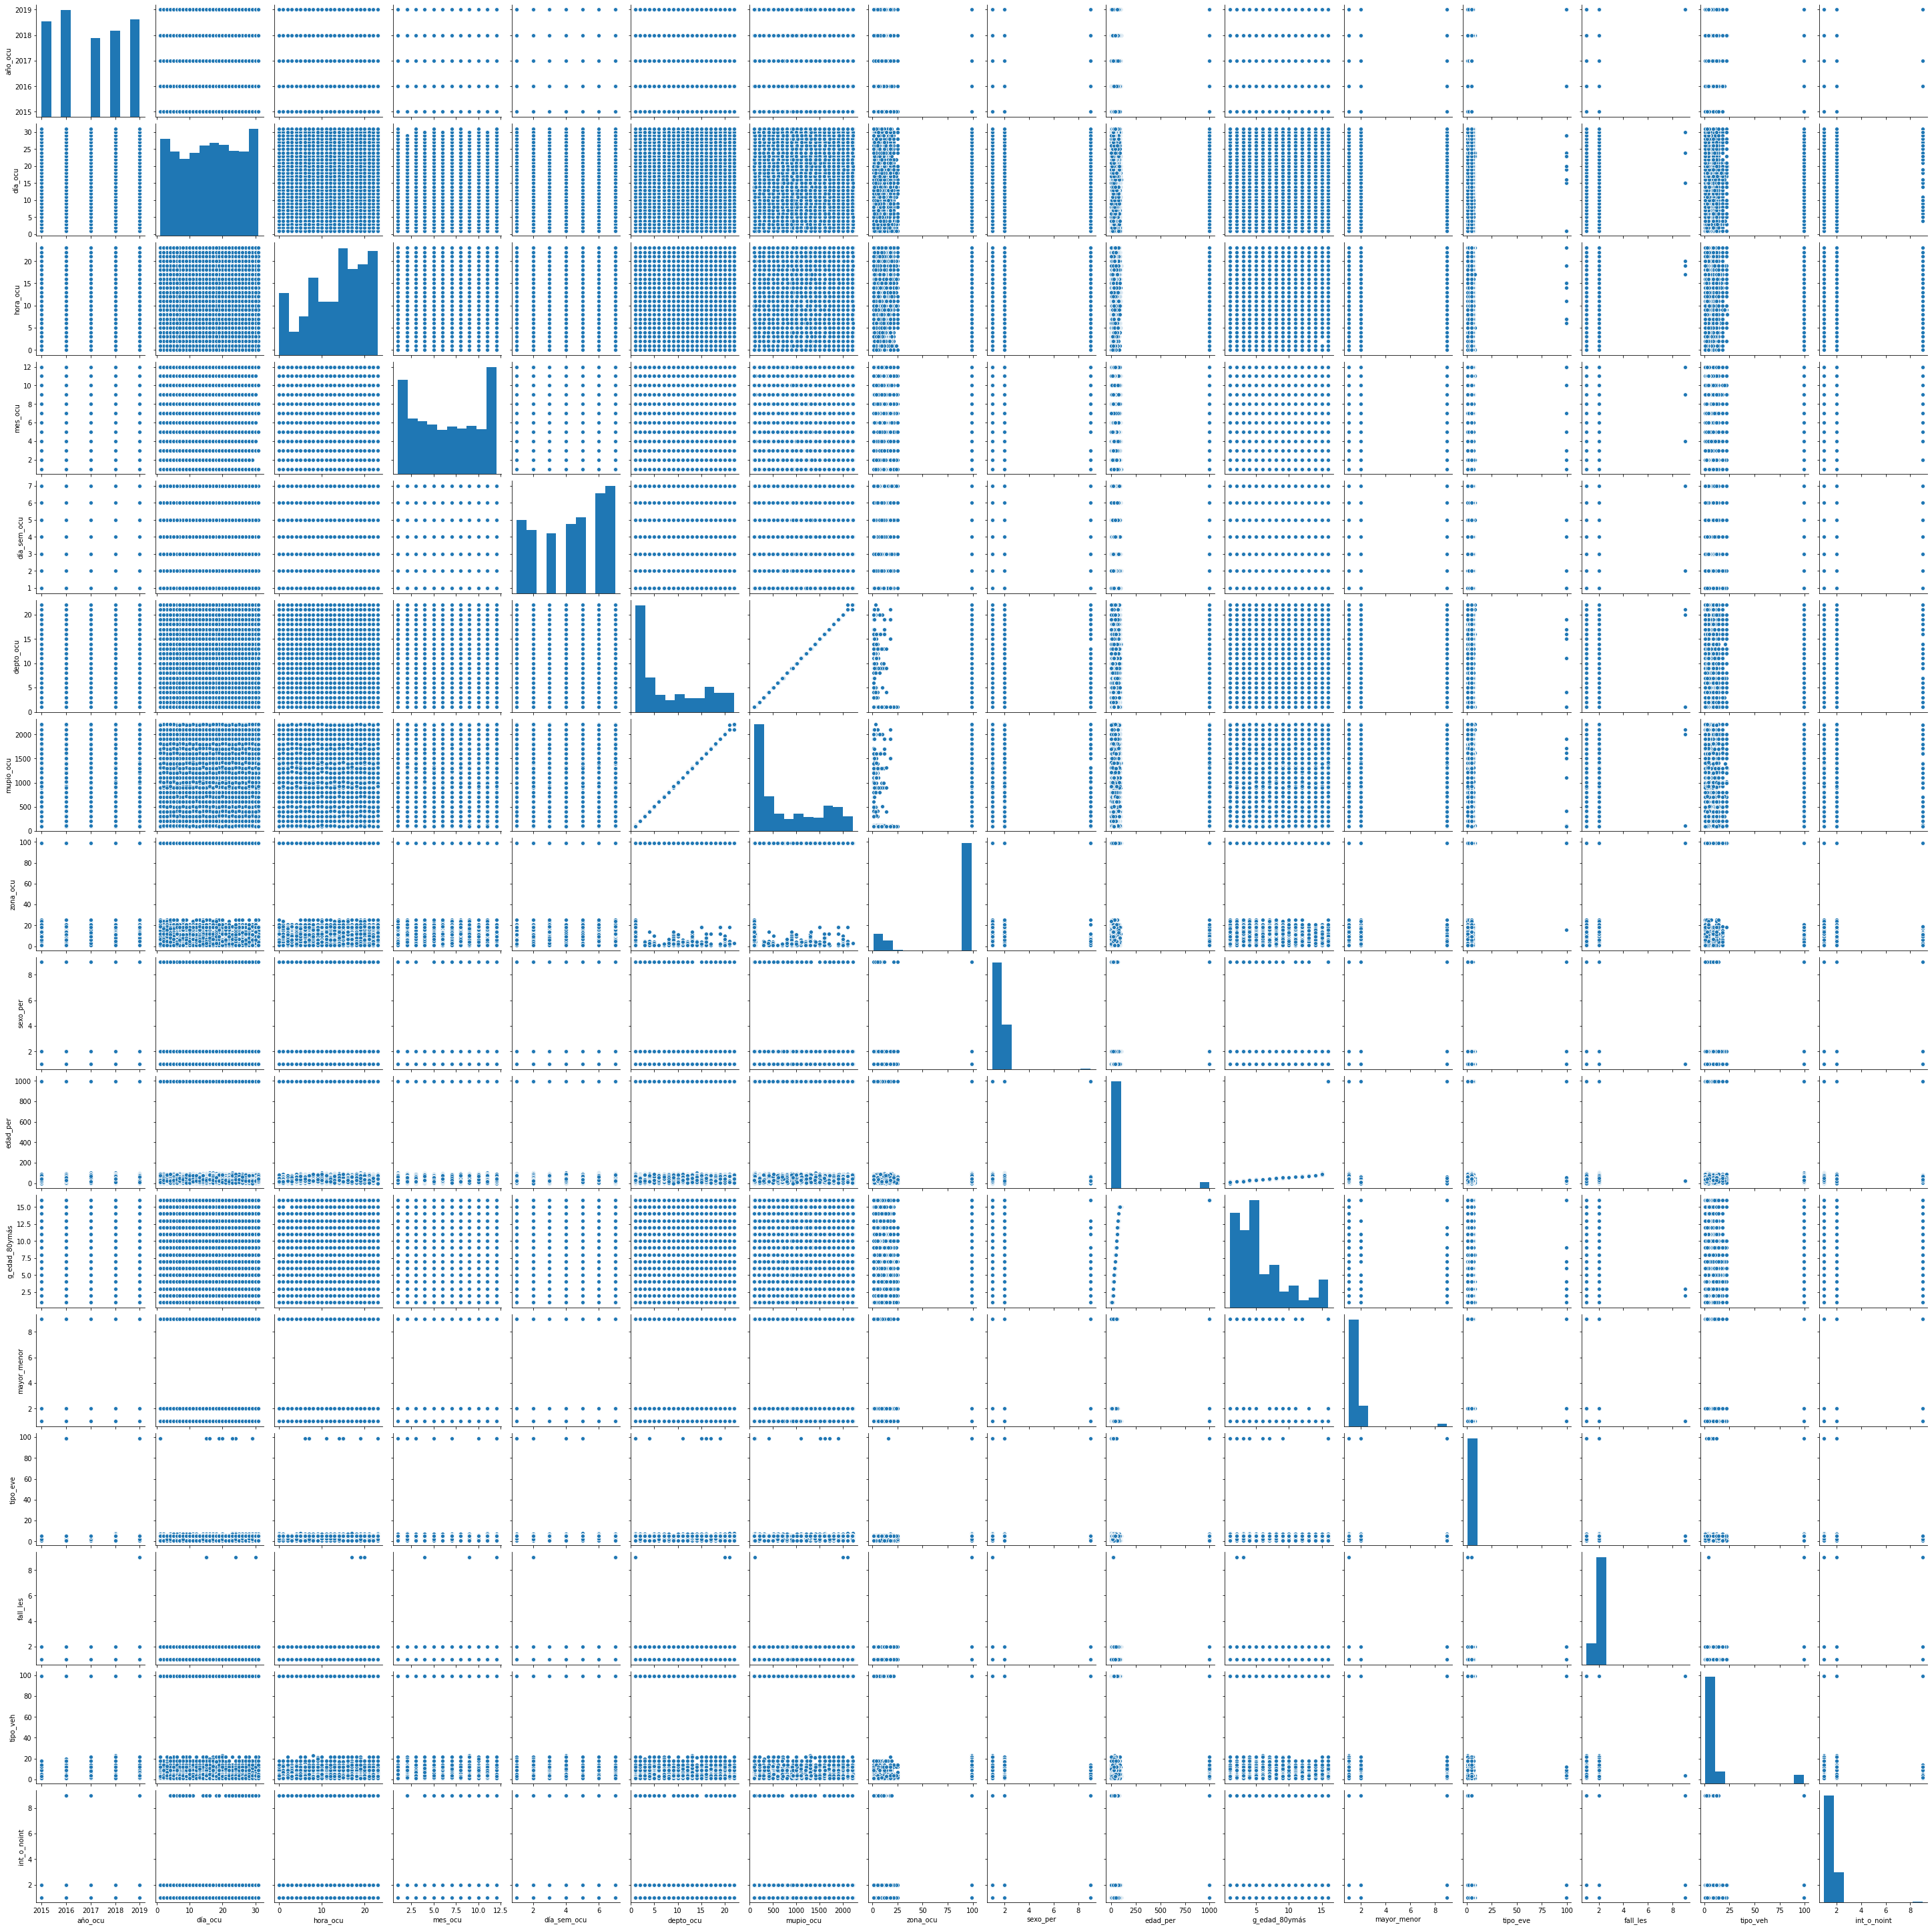

In [ ]:
sb.pairplot(fyl)

In [ ]:
hdt = pd.concat([hdt19_limpio, hdt18_limpio, hdt17_limpio, hdt16_limpio, hdt15_limpio], axis=0)
hdt = hdt.drop(["día_sem_ocu","área_geo_ocu","sexo_per","edad_per","mayor_menor","g_edad_80ymás","g_edad_60ymás","edad_quinquenales","estado_con"], axis=1)
hdt.describe()

,año_ocu,día_ocu,hora_ocu,mes_ocu,depto_ocu,zona_ocu,tipo_veh,tipo_eve
count,34139.000000,34139.000000,34139.000000,34139.000000,34139.000000,34139.000000,34139.000000,34139.000000
mean,2016.965348,15.659012,13.568997,6.582032,7.429040,77.631126,12.408653,2.760069
std,1.431159,8.842649,6.861694,3.520947,6.928471,38.529112,27.316234,2.541193
min,2015.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2016.000000,8.000000,8.000000,3.000000,1.000000,99.000000,2.000000,1.000000
50%,2017.000000,16.000000,15.000000,7.000000,5.000000,99.000000,4.000000,2.000000
75%,2018.000000,23.000000,19.000000,10.000000,13.000000,99.000000,5.000000,5.000000
max,2019.000000,31.000000,23.000000,12.000000,22.000000,99.000000,99.000000,99.000000


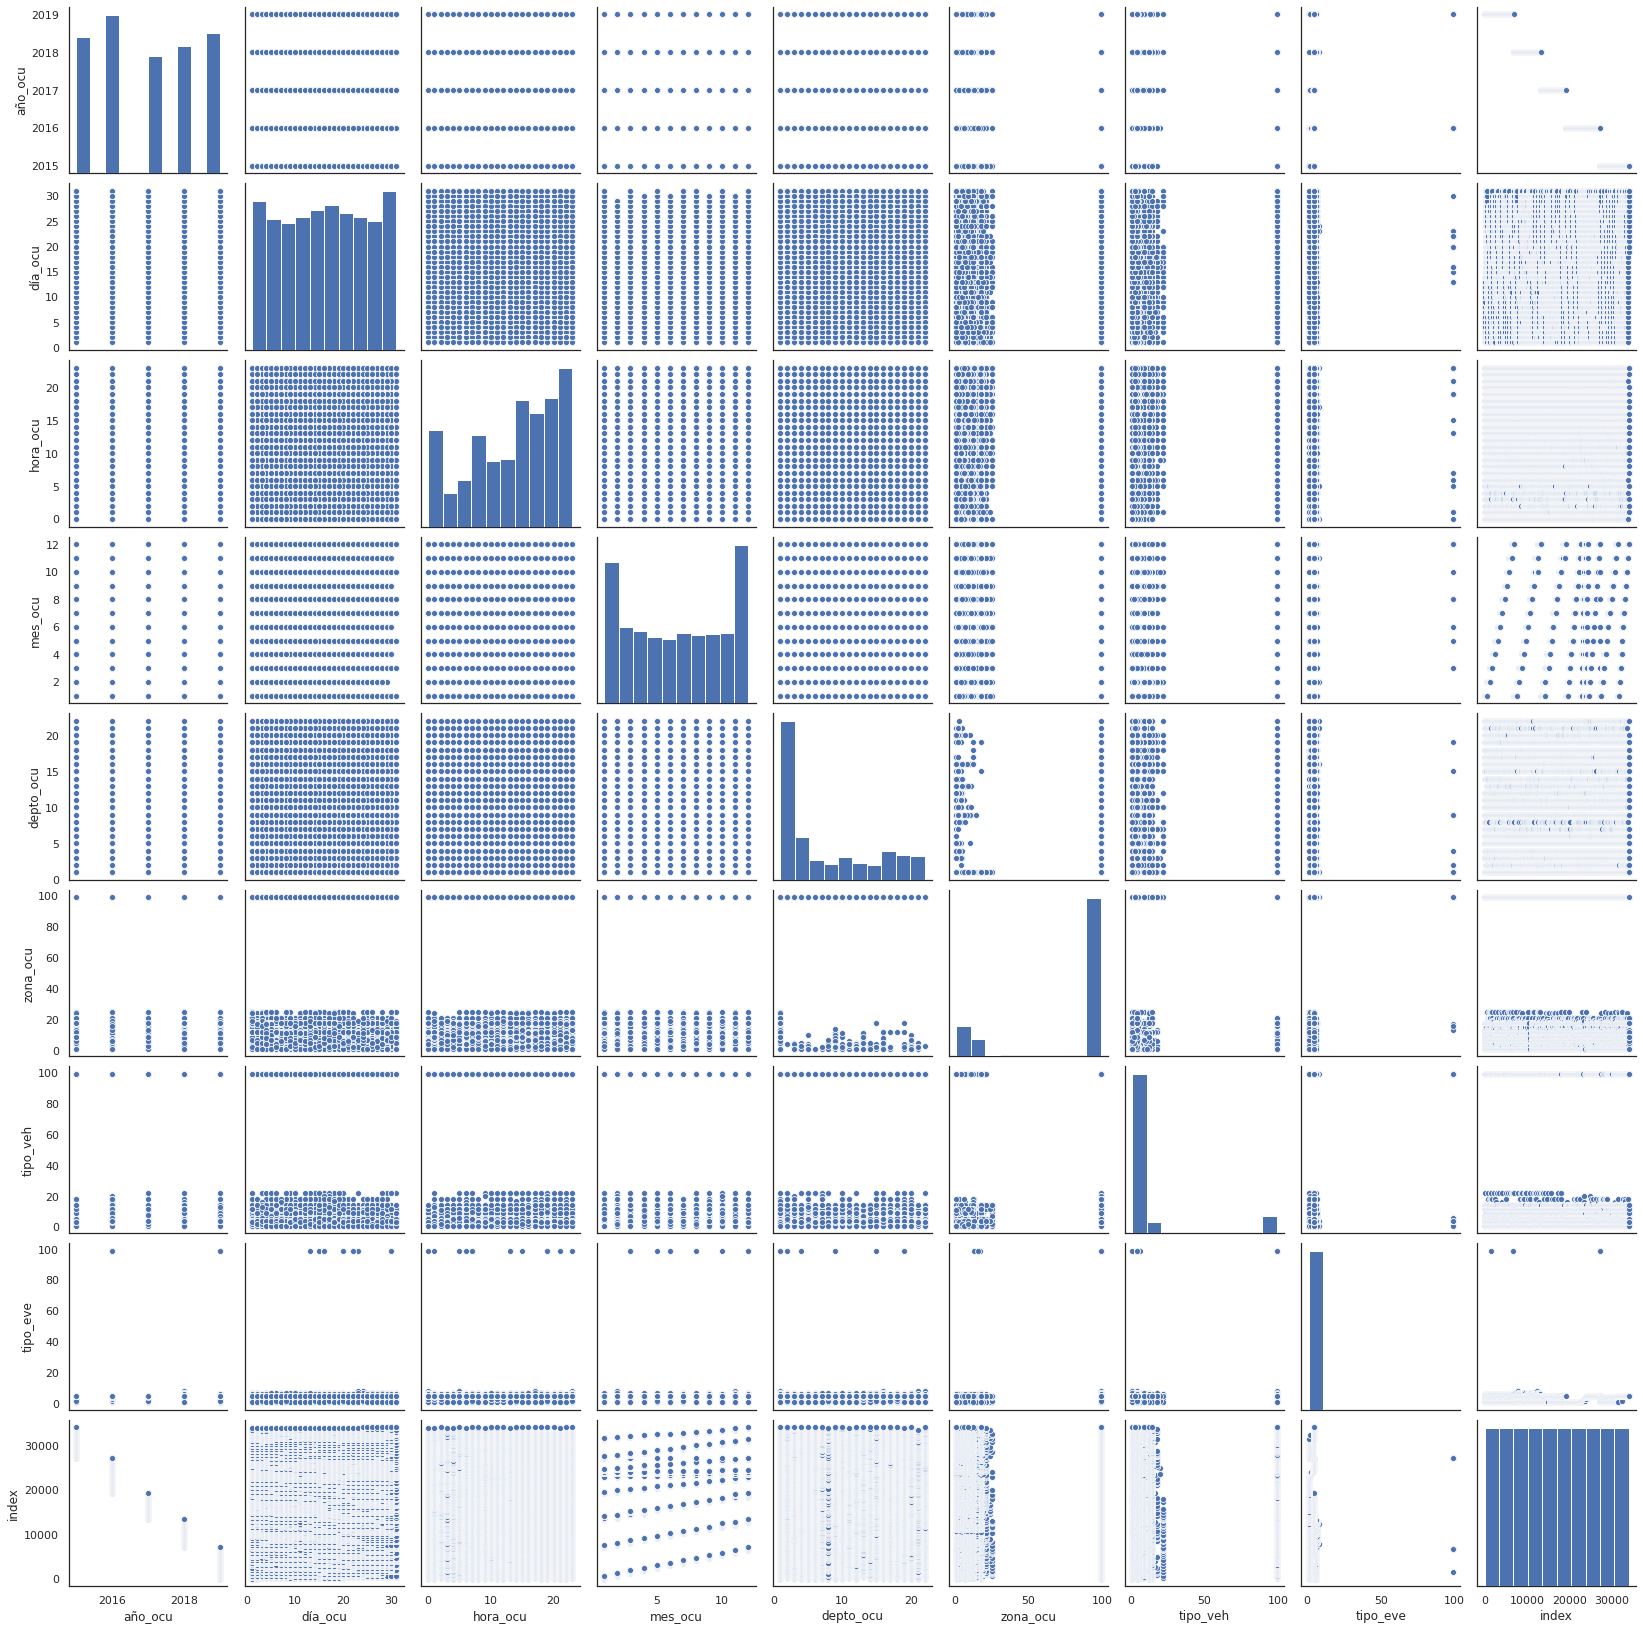

In [ ]:
sb.pairplot(hdt)

In [ ]:
vi = pd.concat([vi19_limpio, vi17_limpio, vi17_limpio, vi16_limpio, vi15_limpio], axis=0)
vi = vi.drop(["num_corre","área_geo_ocu","núm_corre"],axis=1)
vi = vi.drop(["g_hora"], axis=1)
vi.describe()

,año_ocu,día_ocu,hora_ocu,g_hora_5,mes_ocu,día_sem_ocu,depto_ocu,mupio_ocu,sexo_per,estado_con,mayor_menor
count,39733.000000,49556.000000,49556.000000,49556.000000,49556.000000,49556.000000,49556.000000,49556.000000,49556.000000,49556.000000,49556.000000
mean,2017.252586,15.649487,13.586811,2.014226,6.597042,4.350533,7.415712,746.966603,2.377674,5.643635,2.480689
std,1.148308,8.807970,6.901257,0.856356,3.496584,2.044061,6.901426,690.249258,2.954139,3.864600,3.079548
min,2016.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,101.000000,1.000000,1.000000,1.000000
25%,2016.000000,8.000000,8.000000,1.000000,4.000000,3.000000,1.000000,108.000000,1.000000,1.000000,1.000000
50%,2017.000000,16.000000,15.000000,2.000000,7.000000,5.000000,5.000000,501.000000,1.000000,9.000000,1.000000
75%,2019.000000,23.000000,19.000000,3.000000,10.000000,6.000000,13.000000,1312.000000,1.000000,9.000000,1.000000
max,2019.000000,31.000000,99.000000,4.000000,12.000000,7.000000,22.000000,2217.000000,9.000000,9.000000,9.000000


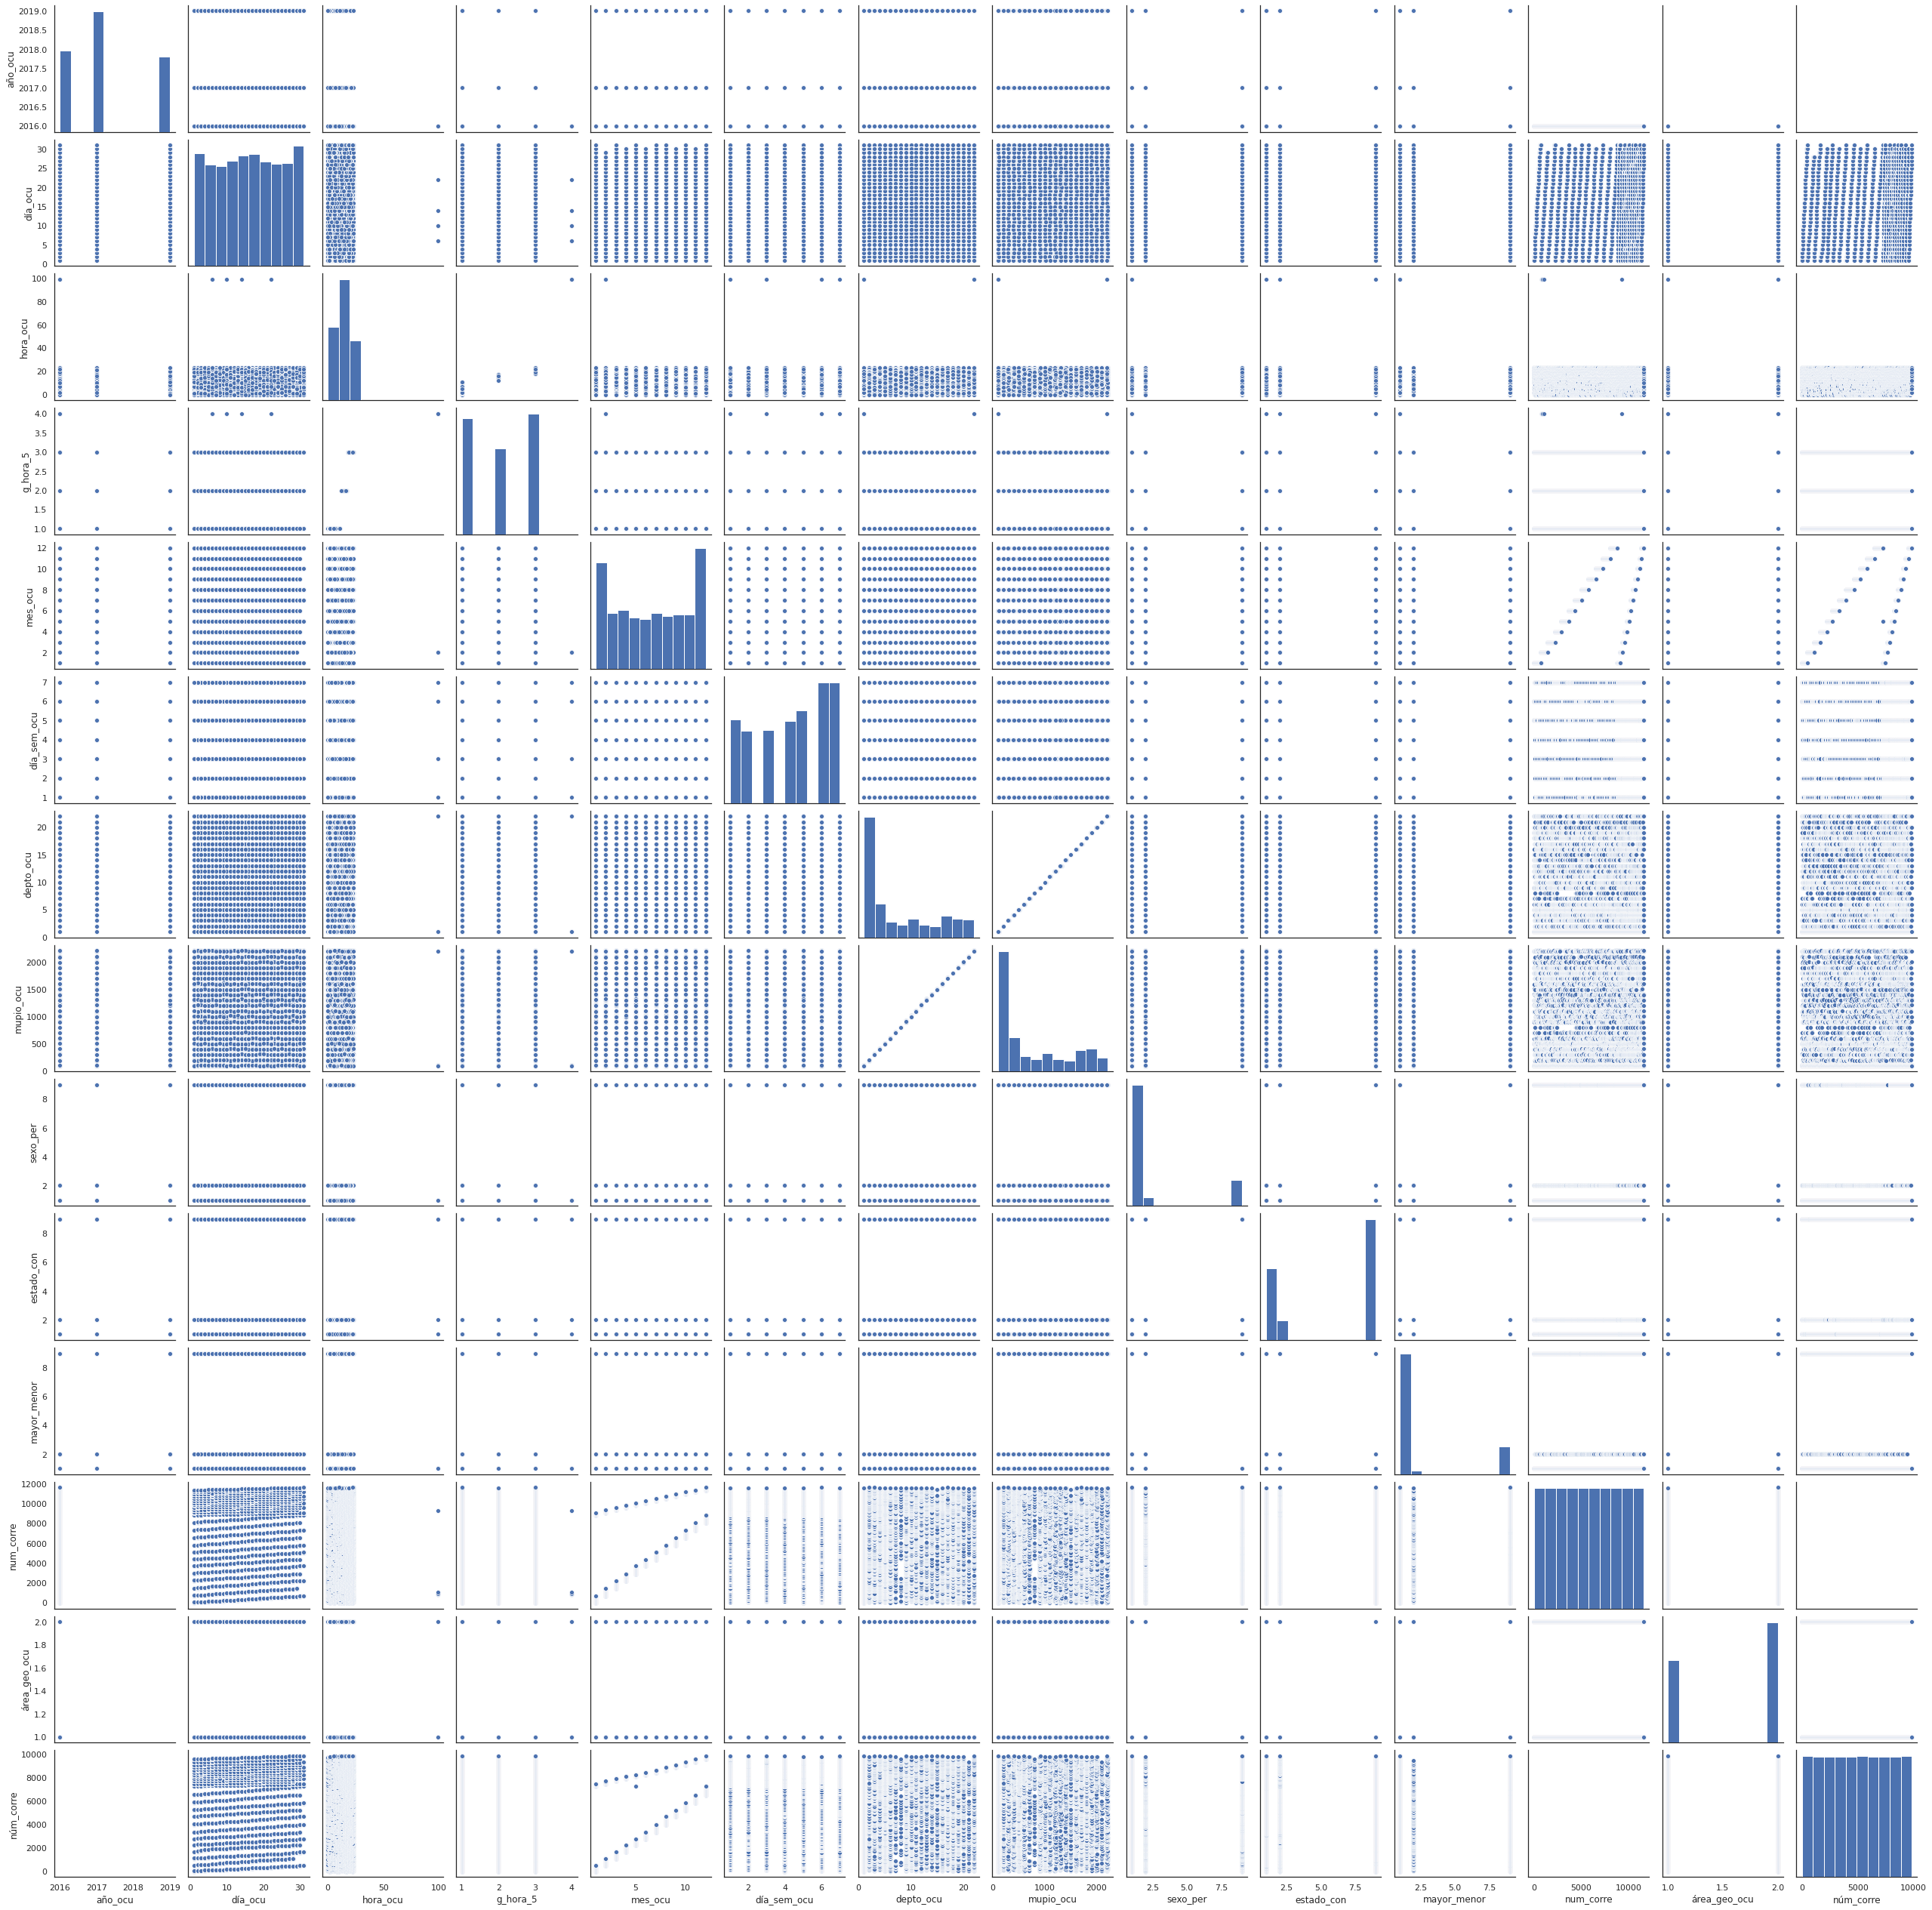

In [ ]:
sb.pairplot(vi)

In [ ]:
vi['index'] = range(1, len(vi) + 1)
vi.head()

,año_ocu,día_ocu,hora_ocu,g_hora_5,mes_ocu,día_sem_ocu,depto_ocu,mupio_ocu,sexo_per,estado_con,mayor_menor,index
0,2019.0,1,5,1,1,2,1,101,1,1,1,1
1,2019.0,1,21,3,1,2,1,101,1,9,1,2
2,2019.0,1,21,3,1,2,1,101,1,9,1,3
3,2019.0,1,7,1,1,2,1,101,1,1,1,4
4,2019.0,1,7,1,1,2,1,101,1,1,1,5


In [ ]:
fyl['index'] = range(1, len(fyl) + 1)
fyl.head()

,año_ocu,día_ocu,hora_ocu,mes_ocu,día_sem_ocu,depto_ocu,mupio_ocu,zona_ocu,sexo_per,edad_per,g_edad_80ymás,mayor_menor,tipo_eve,fall_les,tipo_veh,int_o_noint,index
0,2019,1,5,1,2,1,101,3,1,20,3,1,6,2,4,1,1
1,2019,1,21,1,2,1,101,1,1,30,5,1,1,2,4,1,2
2,2019,1,21,1,2,1,101,1,2,34,5,1,1,2,4,1,3
3,2019,1,7,1,2,1,101,18,1,30,5,1,1,2,4,1,4
4,2019,1,11,1,2,1,102,99,1,23,3,1,1,2,4,1,5


In [ ]:
hdt['index'] = range(1, len(hdt) + 1)
hdt.head()

,año_ocu,día_ocu,hora_ocu,mes_ocu,depto_ocu,zona_ocu,tipo_veh,tipo_eve,index
0,2019,1,5,1,1,3,4,6,1
1,2019,1,21,1,1,1,2,1,2
2,2019,1,7,1,1,18,1,1,3
3,2019,1,11,1,1,99,1,1,4
4,2019,1,8,1,1,7,4,6,5



# Recomendaciones que se dieron en el avance del proyecto

1.   Fecha: esto podría ser importante a la hora de buscar una tendencia de fechas en las cuales suelen aumentar los accidentes.
2.   Hora: esto nos podría decir si realmente las horas "pico" son las que suelen tener más accidentes o no
1. Zona: zona en la que ocurrieron los accidentes



## Resultados


Figura No.1 
---

<Figure size 432x288 with 0 Axes>

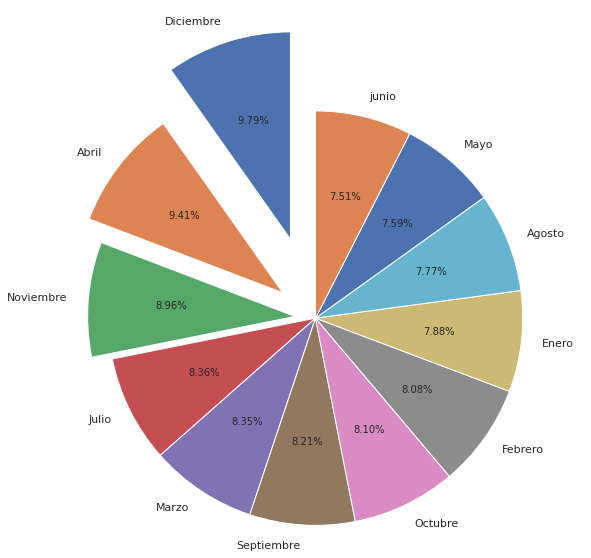

In [ ]:
labels = "Diciembre","Abril","Noviembre","Julio","Marzo","Septiembre","Octubre","Febrero","Enero","Agosto","Mayo","junio"
plt.figure()
month_count = fyl["mes_ocu"].value_counts()
fig1, ax1 = plt.subplots(figsize=(10,10))
explode = (0.4, 0.2,0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, )
ax1.pie(month_count, explode=explode, labels=labels, autopct='%1.2f%%', startangle=90)
ax1.axis('equal') 
plt.show()

FIGURA NO. 1 Proporción de accidentes por mes


Figura No.2 
---

Cantidad de accidentes dividido por meses

In [ ]:
accidentes_por_mes = vi['mes_ocu'].value_counts()
accidentes_por_mes = pd.DataFrame({'month':accidentes_por_mes.index, 'count':accidentes_por_mes.values})
accidentes_por_mes

,month,count
0,12,4749
1,4,4409
2,11,4322
3,7,4217
4,3,4184
5,9,4088
6,10,4064
7,2,4015
8,1,3974
9,8,3941


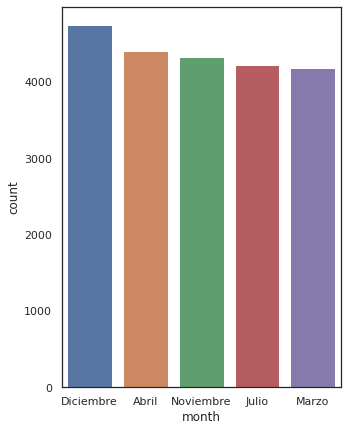

In [ ]:
accidentes_por_mes = vi['mes_ocu'].value_counts()
accidentes_por_mes = pd.DataFrame({'month':accidentes_por_mes.index, 'count':accidentes_por_mes.values})
accidentes_por_mes
month = {'1':'Enero',
        '2':'Febrero',
        '3':'Marzo',
        '4':'Abril',
        '5':'Mayo',
        '6':'Junio',
        '7':'Julio',
        '8':'Agosto',
        '9':'Septiembre',
        '10':'Octubre',
        '11':'Noviembre',
        '12':'Diciembre'
        }
for i in range(1, 13):
  accidentes_por_mes.loc[ accidentes_por_mes['month'] == i, 'month' ] = month[f'{i}']


plt.figure(figsize=(5,7))
sb.barplot(x='month', y='count', data=accidentes_por_mes.head(5))

Figura No. 2 Comparación de los 5 meses con más accidentes

Figura No.3 
---

comenzamos cuantos accidentes hay por departamento

In [ ]:
accidents_by_dpt_december = vi.loc[vi['mes_ocu'] == 12]
accidents_by_dpt_december_drunk = accidents_by_dpt_december.loc[accidents_by_dpt_december['estado_con']==2]
accidents_by_dpt_december = accidents_by_dpt_december['depto_ocu'].value_counts()
accidents_by_dpt_december_drunk = accidents_by_dpt_december_drunk['depto_ocu'].value_counts()
accidents_by_dpt_december = pd.DataFrame({'dpt':accidents_by_dpt_december.index, 'count':accidents_by_dpt_december.values})
accidents_by_dpt_december_drunk = pd.DataFrame({'dpt':accidents_by_dpt_december_drunk.index, 'count':accidents_by_dpt_december_drunk.values})

Se pone el nombre a cada departamento según su código

In [ ]:
dpts = {'1':'GUATEMALA',
        '2':'EL PROGRESO',
        '3':'SACATEPEQUEZ',
        '4':'CHIMALTENANGO',
        '5':'ESCUINTLA',
        '6':'SANTA ROSA',
        '7':'SOLOLA',
        '8':'TOTONICAPAN',
        '9':'QUETZALTENANGO',
        '10':'SUCHITEPEQUEZ',
        '11':'RETALHULEU',
        '12':'SAN MARCOS',
        '13':'HUEHUETENANGO',
        '14':'QUICHE',
        '15':'BAJA VERAPAZ',
        '16':'ALTA VERAPAZ',
        '17':'PETEN',
        '18':'IZABAL',
        '19':'ZACAPA',
        '20':'CHIQUIMULA',
        '21':'JALAPA',
        '22':'JUTIAPA'
        }
for i in range(1, 23):
  accidents_by_dpt_december.loc[ accidents_by_dpt_december['dpt'] == i, 'dpt' ] = dpts[f'{i}']
accidents_by_dpt_december['dpt'].unique()

for i in range(1, 23):
  accidents_by_dpt_december_drunk.loc[ accidents_by_dpt_december_drunk['dpt'] == i, 'dpt' ] = dpts[f'{i}']
accidents_by_dpt_december_drunk['dpt'].unique()

array(['GUATEMALA', 'ESCUINTLA', 'SANTA ROSA', 'SACATEPEQUEZ', 'JUTIAPA',
       'CHIMALTENANGO', 'RETALHULEU', 'ALTA VERAPAZ', 'SAN MARCOS',
       'QUICHE', 'PETEN', 'SUCHITEPEQUEZ', 'BAJA VERAPAZ',
       'QUETZALTENANGO', 'HUEHUETENANGO', 'IZABAL', 'ZACAPA',
       'EL PROGRESO', 'JALAPA', 'SOLOLA', 'TOTONICAPAN', 'CHIQUIMULA'],
      dtype=object)

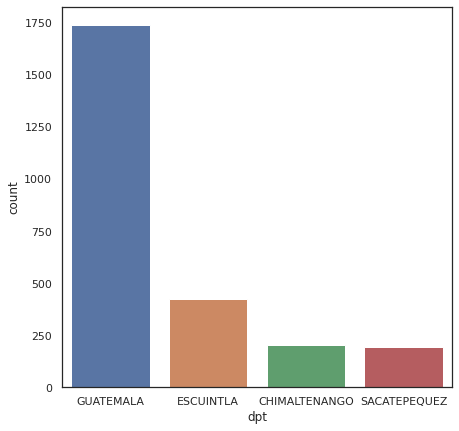

In [ ]:
plt.figure(figsize=(7,7))
sb.barplot(x='dpt', y='count', data=accidents_by_dpt_december.head(4))

Figura No. 3 departamentos con más accidentes el mes de diciembre


Figura No.4 
---

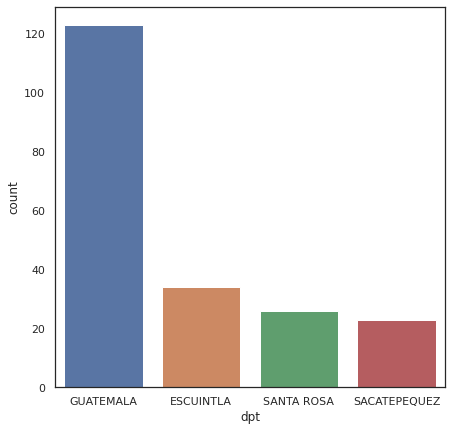

In [ ]:
plt.figure(figsize=(7,7))
sb.barplot(x='dpt', y='count', data=accidents_by_dpt_december_drunk.head(4))

Figura No. 4 departamentos con más accidentes el mes de diciembre en los cuales una persona ebria estuvo involucrada

Figura No.5 
---

Ya se observo que existe un mes del año donde realmente ocurren más accidentes, por lo que se procede a observar si existe una hora en la cuál los accidentes aumentan estos meses

In [ ]:
accidents_by_hour_december = vi.loc[vi['mes_ocu'] == 12]
accidents_by_hour_december = accidents_by_hour_december['hora_ocu'].value_counts()
accidents_by_hour_december = pd.DataFrame({'hora':accidents_by_hour_december.index, 'count':accidents_by_hour_december.values})

hora = {'1':'0H',
        '2':'1H',
        '3':'2H',
        '4':'3H',
        '5':'4H',
        '6':'5H',
        '7':'6H',
        '8':'7H',
        '9':'8H',
        '10':'9H',
        '11':'10H',
        '12':'11H',
        '13':'12H',
        '14':'13H',
        '15':'14H',
        '16':'15H',
        '17':'16H',
        '18':'17H',
        '19':'18H',
        '20':'19H',
        '21':'20H',
        '22':'21H',
        '23':'22H',
        '24':'23H'

        }
for i in range(1, 25):
  accidents_by_hour_december.loc[ accidents_by_hour_december['hora'] == i, 'hora' ] = hora[f'{i}']
accidents_by_hour_december['hora'].unique()

accidents_by_hour_june = vi.loc[vi['mes_ocu'] == 6]
accidents_by_hour_june = accidents_by_hour_june['hora_ocu'].value_counts()
accidents_by_hour_june = pd.DataFrame({'hora':accidents_by_hour_june.index, 'count':accidents_by_hour_june.values})

hora = {'1':'0H',
        '2':'1H',
        '3':'2H',
        '4':'3H',
        '5':'4H',
        '6':'5H',
        '7':'6H',
        '8':'7H',
        '9':'8H',
        '10':'9H',
        '11':'10H',
        '12':'11H',
        '13':'12H',
        '14':'13H',
        '15':'14H',
        '16':'15H',
        '17':'16H',
        '18':'17H',
        '19':'18H',
        '20':'19H',
        '21':'20H',
        '22':'21H',
        '23':'22H',
        '24':'23H'

        }
for i in range(1, 25):
  accidents_by_hour_june.loc[ accidents_by_hour_june['hora'] == i, 'hora' ] = hora[f'{i}']
accidents_by_hour_june['hora'].unique()

array(['18H', '22H', '19H', '21H', 0, '17H', '14H', '16H', '20H', '10H',
       '15H', '12H', '13H', '11H', '9H', '6H', '7H', '1H', '0H', '8H',
       '2H', '5H', '4H', '3H'], dtype=object)

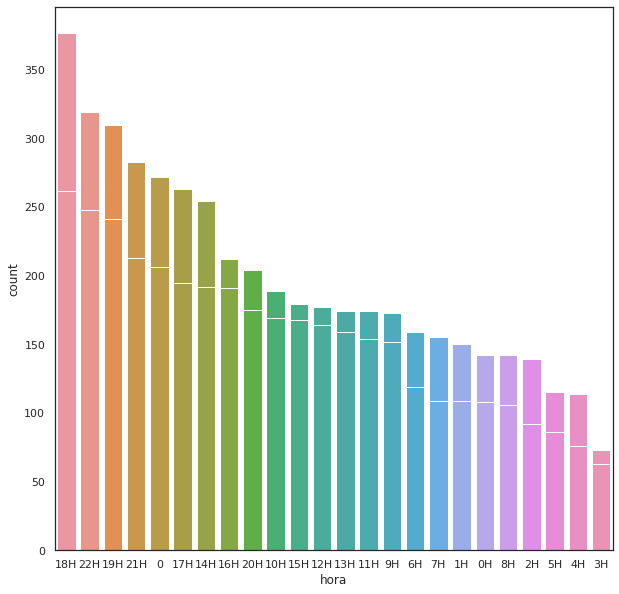

In [ ]:
plt.figure(figsize=(10,10))
sb.barplot(x='hora', y='count', data=accidents_by_hour_december)
sb.barplot(x='hora', y='count', data=accidents_by_hour_june)

Figura No. 5 cantidad de accidentes repartidos en horas

Descripción: en la parte de arriba es la diferencia de cantidad de accidentes que hay en el mes con más accidentes (diciembre) y el que menos accidentes tiene (junio)

# Discusión


Como se puede observar en las gráficas No.1 y No.2, los meses con más accidentes son diciembre, noviembre y abril. No es casualidad  que estos son los meses en los que se acercan fiestas y feriados. Siendo [navidad](https://www.google.com/search?q=navidad&oq=navidad&aqs=chrome..69i57j0l6j46.700j0j9&sourceid=chrome&ie=UTF-8) y [halloween](https://www.google.com/search?q=halloween&oq=halloween&aqs=chrome..69i57j35i39l2j0j69i60l3j69i61.2375j0j9&sourceid=chrome&ie=UTF-8) en el caso de los meses de noviembre y diciembre, y [semana santa](https://www.google.com/search?sxsrf=ALeKk00FljcZj8j3r9Xl1oO-YjtkJZUZ1g%3A1596662007640&ei=9yArX7mrJq-a_Qazub_wBw&q=semana+santa+2017&oq=semana+santa+2017&gs_lcp=CgZwc3ktYWIQAzIECCMQJzICCAAyAggAMgIIADICCAAyAggAMgIIADICCAAyAggAMgIIADoECAAQRzoECAAQQ1CTH1jqIWDjImgAcAF4AIABeIgB5wGSAQMwLjKYAQCgAQGqAQdnd3Mtd2l6wAEB&sclient=psy-ab&ved=0ahUKEwj5gqq-_YTrAhUvTd8KHbPcD34Q4dUDCAw&uact=5) en el caso de abril. Por lo que se presume que la mayoría de accidentes son atribuidos por el alcohol. 

Pero observando las gráficas No. 3 y No. 4, el alcohol sí representa una buena parte de estos accidentes pero no se ve involucrado en todos. Por lo que al obser la gráfica No.5 podemos concluir que uno de los factores que frecuente en los accidentes vehiculares es el sueño, esto debido a que las personas suelen viajar luego de una jornada de trabajo laboriosa o deciden salir de noche para evitar el tráfico. Como se puede observar en la figura No. 5, la cantidad de accidentes es mayor a las 6:00 P.M., la hora en la que la mayoría de personas terminan su turno de trabajo. Y la hora que muchas personas ocupan para viajar a su casa o al interior del país. Esto aumenta en los meses de fiestas de diciembre y es una preocupación que se tiene año con año.  

El siguiente [articulo](https://elsiglo.com.gt/2017/12/11/fiestas-de-fin-de-ano-generan-mas-accidentes-de-transito/), publicado por *El Siglo*,también nos confirma que a partir de las 6 de la tarde, la cantidad de accidentes aumenta. observando las graficas No. 3 y 4 podemos observar que el departamento con más accidentes vehiculares es Guatemala, por lo que se recomendaría tener más vigilancia en las zonas con más frecuencia de accidentes vehiculares.

#Conclusiones



*   A partir de las 6 de la tarde los accidentes vehiculares aumentan
*   Los meses noviembre y diciembre se deben aumentar la vigilancia en las zonas con más frecuencia de accidentes 



#Recomendaciones




*   Deberían poner más importancia a las zonas en las que ocurren los accidentes, ya que en muchos casos es ignorado
*   Ver el nivel de ilumiación del lugar donde fue un choque, ya que vimos que los accidentes suelen occurir con más frecuencia en la tarde
* Tipo de carretera, es importante ver si la carretera esta bien asfaltada, ya que si no lo esta puede signifcar un peligro. Sobre todo si es de noche
* Ubicación, que algunas partes del país no estan divididas por zonas, sería un buen dato tener la longitud y latitud del accidente para ser más exactos del lugar del accidente



# Comparaciones con otro País


Londres:

* En londres existe una [tarifa](https://www.visitlondon.com/es/informacion-para-el-viajero/viajar-a-londres/conducir-en-londres#:~:text=La%20tarifa%20de%20congesti%C3%B3n%20(Congestion,a%20los%20veh%C3%ADculos%20m%C3%A1s%20contaminantes.) que se debe pagar en ciertas áreas delimitadas  para que se permita que una persona pueda transitar entre las 7 de la mañana y 6 de la tarde. Esto inicio en el año 2009 con un costo inicial de 5 libras. En caso de que un conductor no pague el peaje, se multa con 50 libras.

* Además en 2009, la [BBC](https://www.bbc.com/mundo/ciencia_tecnologia/2009/12/091211_velocidad_muertes_men) publicó un artículo con los resultados de accidentes vehiculares en Londres luego de que se implementara una ley, haciendo que el nuevo limite de velocidad fuera  de 30 km/hr. Mostrando que se redujo en más de un 41% de lesiones y muertes en accidentes de transito





Probablemente la primera practica no sería bien recibida en el paísde Guatemala, pero la segunda, sin duda ayudaría a reducir los accidentes vehiculares. Más si se aplican en los meses y horas que se han mencionado anteriormente